# import packages 

In [1]:
import allel
import malariagen_data
import dask
import dask.array as da
# silence some dask warnings
dask.config.set(**{'array.slicing.split_large_chunks': True})
from dask.diagnostics.progress import ProgressBar

In [2]:
import pandas as pd
import allel
#import sgkit as sg
#from sgkit.io.vcf import vcf_to_zarr
import numpy as np
import petl as ptl

In [43]:
# plotting setup
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import matplotlib_venn as venn
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%config InlineBackend.figure_format = "retina"
%matplotlib inline

In [4]:
plt.rcdefaults()
sns.reset_defaults()
rcParams = plt.rcParams
base_font_size = 11
rcParams['font.size'] = base_font_size
rcParams['axes.titlesize'] = base_font_size
rcParams['axes.labelsize'] = base_font_size
rcParams['xtick.labelsize'] = base_font_size
rcParams['ytick.labelsize'] = base_font_size
rcParams['legend.fontsize'] = 10
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['patch.linewidth'] = .5
rcParams['ytick.direction'] = 'out'
rcParams['xtick.direction'] = 'out'
#rcParams['savefig.jpeg_quality'] = 100
rcParams['lines.markeredgewidth'] = .5
rcParams['figure.max_open_warning'] = 1000
rcParams['figure.facecolor'] = 'w'

# Read data table

In [5]:
## read table 
freq_data_1 = pd.read_csv('data1.csv').fillna(0)
freq_data_1['max_agf1'] = freq_data_1[['frq_Pala_gam_2014', 'frq_Sour_gam_2014', 'frq_Bana_gam_2014','frq_Pala_gam_2015', 
                                      'frq_Sour_gam_2015', 'frq_Bana_gam_2016', 'frq_Pala_gam_2016', 'frq_Sour_gam_2016', 
                                      'frq_Pala_gam_2017', 'frq_Pala_gam_2012','frq_Bana_gam_2012', 'frq_Sour_gam_2012']].max(axis=1)
freq_data_1['max_acf1'] = freq_data_1[['frq_Sour_col_2014', 'frq_Bana_col_2014','frq_Sour_col_2015', 'frq_Bana_col_2015', 
                                       'frq_Bana_col_2016', 'frq_Sour_col_2016', 'frq_Bana_col_2017','frq_Sour_col_2017', 
                                       'frq_Bana_col_2012', 'frq_Sour_col_2012','frq_Pala_col_2012', ]].max(axis=1)
#freq_data_1

In [6]:
freq_data_1.columns

Index(['Unnamed: 0', 'contig', 'position', 'ref_allele', 'alt_allele',
       'aa_change', 'pass_gamb_colu_arab', 'pass_gamb_colu', 'pass_arab',
       'frq_Pala_gam_2014', 'frq_Sour_gam_2014', 'frq_Sour_col_2014',
       'frq_Bana_gam_2014', 'frq_Pala_ara_2014', 'frq_Bana_col_2014',
       'frq_Pala_ara_2015', 'frq_Pala_gam_2015', 'frq_Sour_col_2015',
       'frq_Bana_col_2015', 'frq_Sour_gam_2015', 'frq_Bana_col_2016',
       'frq_Bana_gam_2016', 'frq_Pala_gam_2016', 'frq_Pala_ara_2016',
       'frq_Sour_col_2016', 'frq_Sour_gam_2016', 'frq_Bana_col_2017',
       'frq_Pala_gam_2017', 'frq_Sour_col_2017', 'frq_Pala_gam_2012',
       'frq_Bana_col_2012', 'frq_Bana_gam_2012', 'frq_Sour_col_2012',
       'frq_Sour_gam_2012', 'frq_Pala_col_2012', 'max_af', 'transcript',
       'effect', 'impact', 'ref_codon', 'alt_codon', 'aa_pos', 'ref_aa',
       'alt_aa', 'label', 'max_agf1', 'max_acf1'],
      dtype='object')

In [7]:
## Read SNPs frequency data table 
data_dsx = pd.read_excel('dsx_amplicon.xlsx', sheet_name='data').fillna(0)
data_dsx['max_af1'] = data_dsx[['lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
                                'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']].max(axis=1)
data_dsx['max_af'] = data_dsx[['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 
                               'pala_ac', 'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']].max(axis=1)
data_dsx['max_afac'] = data_dsx[['lab_sample', 'bana_ac', 'sk_ac', 'pala_ac', 'soni_ac', 'mg_ac','ti_ac', 
                                 'saran_ac', 'tosson_ac']].max(axis=1)
data_dsx['max_afag'] = data_dsx[['sk_ag', 'sk_ac', 'pala_aa', 'pala_ag']].max(axis=1)

data_dsx

,chrom,pos,id,ref,alt,region,Ag1000G,lab_sample,bana_ac,sk_ag,...,pala_ac,soni_ac,mg_ac,ti_ac,saran_ac,tosson_ac,max_af1,max_af,max_afac,max_afag
0,2R,48714439,.,C,T,UTR,0.001650,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000000,0.000000
1,2R,48714441,.,G,T,UTR,0.000000,0.000000,0.000696,0.000655,...,0.000000,0.000000,0.000735,0.000740,0.000000,0.000000,0.000746,0.000746,0.000740,0.000746
2,2R,48714444,.,G,T,UTR,0.000000,0.000901,0.000928,0.001039,...,0.001111,0.000985,0.001103,0.001715,0.000907,0.000919,0.001715,0.001715,0.001715,0.001213
3,2R,48714445,.,C,A,UTR,0.022581,0.000000,0.000000,0.000655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001143,0.022581,0.000000,0.001143
4,2R,48714445,.,C,T,UTR,0.017857,0.000999,0.001141,0.001355,...,0.000937,0.001135,0.001264,0.001245,0.001259,0.000895,0.001632,0.017857,0.001264,0.001632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2R,48714704,.,C,A,Intron,0.004425,0.000000,0.001199,0.001491,...,0.001242,0.001306,0.001195,0.001177,0.000000,0.001523,0.001935,0.004425,0.001523,0.001935
97,2R,48714707,.,A,G,Intron,0.030973,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030973,0.000000,0.000000
98,2R,48714708,.,C,T,Intron,0.005952,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005952,0.000000,0.000000
99,2R,48714714,.,T,A,Intron,0.004870,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004870,0.000000,0.000000


In [8]:
data_dsx_max_af = data_dsx.query('max_af > 0.01')
data_dsx_max_af

,chrom,pos,id,ref,alt,region,Ag1000G,lab_sample,bana_ac,sk_ag,...,pala_ac,soni_ac,mg_ac,ti_ac,saran_ac,tosson_ac,max_af1,max_af,max_afac,max_afag
3,2R,48714445,.,C,A,UTR,0.022581,0.000000,0.000000,0.000655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001143,0.022581,0.000000,0.001143
4,2R,48714445,.,C,T,UTR,0.017857,0.000999,0.001141,0.001355,...,0.000937,0.001135,0.001264,0.001245,0.001259,0.000895,0.001632,0.017857,0.001264,0.001632
7,2R,48714448,.,A,T,UTR,0.002058,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.040228,0.000000,0.040228,0.040228,0.040228,0.000000
8,2R,48714449,.,C,A,UTR,0.002058,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.040228,0.000000,0.040228,0.040228,0.040228,0.000000
11,2R,48714453,.,G,A,UTR,0.065476,0.001169,0.001586,0.067266,...,0.001460,0.001049,0.001172,0.001581,0.001537,0.001354,0.067266,0.067266,0.001586,0.067266
17,2R,48714469,.,C,T,UTR,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.047143,0.000000,0.000000,0.047143,0.047143,0.047143,0.000000
18,2R,48714472,.,A,T,UTR,0.002058,0.172720,0.000000,0.000000,...,0.000000,0.006849,0.000000,0.000000,0.000000,0.000000,0.172720,0.172720,0.172720,0.000000
24,2R,48714486,.,C,A,UTR,0.500000,0.108318,0.409296,0.012152,...,0.388738,0.314302,0.430539,0.388005,0.428179,0.448284,0.448284,0.500000,0.448284,0.411968
25,2R,48714486,.,C,G,UTR,0.004425,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024135,0.024135,0.000000,0.024135
27,2R,48714494,.,C,G,UTR,0.014403,0.000000,0.000000,0.000000,...,0.014233,0.011034,0.018273,0.000000,0.032324,0.000000,0.032324,0.032324,0.032324,0.028586


In [9]:
## count snp number
print('Ag1000G = ', np.count_nonzero(data_dsx.Ag1000G), 'SNPs')
print('data_bf = ', np.count_nonzero(data_dsx.max_af1), 'SNPs')
print('An. coluzzii = ', np.count_nonzero(data_dsx.max_afac), 'SNPs')
print('An. gambiae ss = ', np.count_nonzero(data_dsx.max_afag), 'SNPs')
print('An. arabiensis = ', np.count_nonzero(data_dsx.pala_aa), 'SNPs')

Ag1000G =  67 SNPs
data_bf =  59 SNPs
An. coluzzii =  49 SNPs
An. gambiae ss =  34 SNPs
An. arabiensis =  16 SNPs


## Variants frequencies 

In [10]:
## data hanling
data_dsx_max_af = data_dsx.query('max_af > 0.01')
col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G','An. coluzzii (Lab)','An. coluzzii (BN)', 'An. gambiae (SK)','An. coluzzii (SK)', 
        'An. arabiensis (PL)', 'An. gambiae ss (PL)', 'An. coluzzii (PL)', 'An. coluzzii (SN)',
        'An. coluzzii (MG)', 'An. coluzzii (TI)', 'An. coluzzii (SR)', 'An. coluzzii (TS)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(data_dsx_max_af)
labels = ['%s:%s(%s>%s) - [%s]' % (rec.chrom, rec.pos, rec.ref, rec.alt,rec.region) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,8.5))

# plot
ax=sns.heatmap(data_dsx_max_af[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax.set_ylabel("SNPs positions")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allele$ $frequencies$')

fig.savefig('dsx_amplicom_freq', dpi=300, bbox_inches='tight')

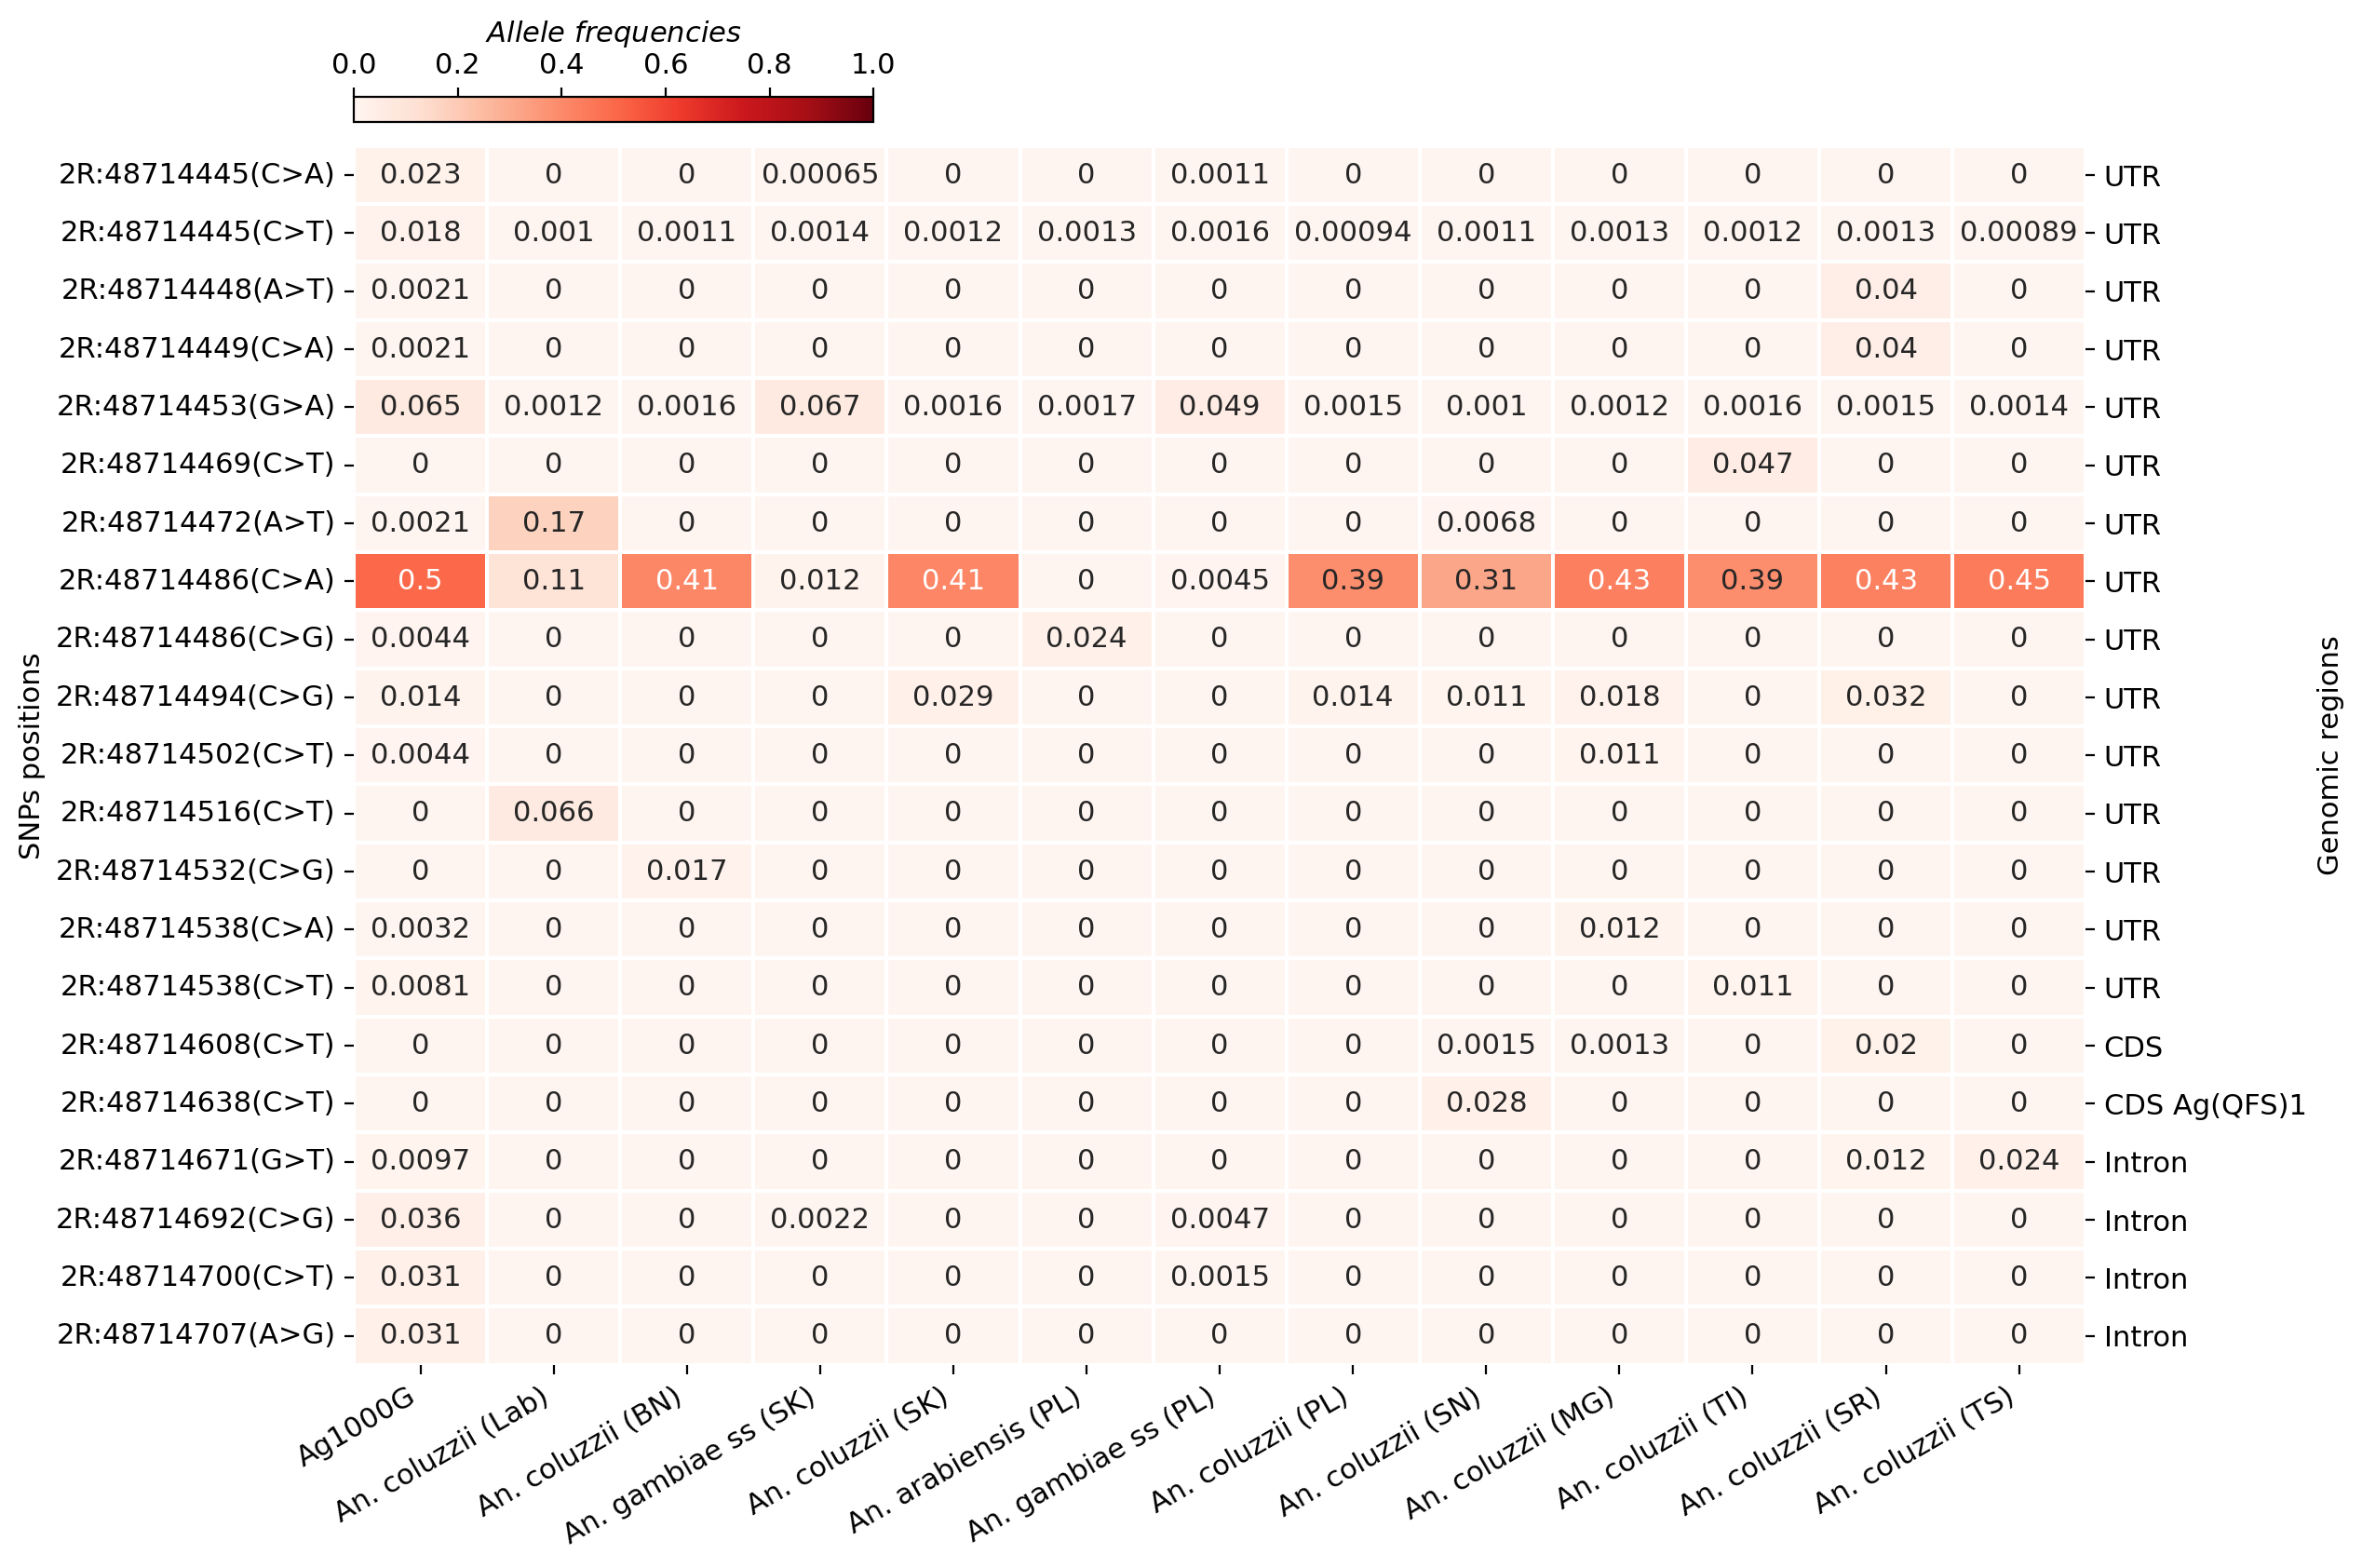

In [66]:
## data handling
data_dsx_max_af = data_dsx.query('max_af > 0.01')
col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G','An. coluzzii (Lab)','An. coluzzii (BN)', 'An. gambiae ss (SK)','An. coluzzii (SK)', 
        'An. arabiensis (PL)', 'An. gambiae ss (PL)', 'An. coluzzii (PL)', 'An. coluzzii (SN)',
        'An. coluzzii (MG)', 'An. coluzzii (TI)', 'An. coluzzii (SR)', 'An. coluzzii (TS)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(data_dsx_max_af)
labels = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,8.5))

# plot
ax1=sns.heatmap(data_dsx_max_af[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax1.set_ylabel("SNPs positions")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax1,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax1.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allele$ $frequencies$')

ax2= ax1.twinx()
ax2.set_ylim([0,ax1.get_ylim()[0]])
ax2.set_yticks(ax1.get_yticks())
labls = ['%s' % (rec.region) for rec in ptl_dsx.records()]
#labls = labels_reg[:-1]
ax2.set_yticklabels(labls[::-1])
ax2.set_ylabel("Genomic regions")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

fig.savefig('Fig. 5.png', dpi=300, bbox_inches='tight')

#print(ax1.get_ylim())
plt.show()

In [102]:
#data_dsx_max_af = data_dsx.query('max_af > 0.01')
#data_dsx_max_af#.iloc[:,:7]

In [100]:
#dt1.columns

In [101]:
#dtx = data_dsx.query('max_af > 0.01')
#dt1 = dtx.iloc[:,7:20]
#dt1[dt1<0.001]=0
#dt1[(dt1>0) & (dt1<0.01)]=0.01
#tx = pd.concat([dtx.iloc[:,:7],dt1],axis=1)

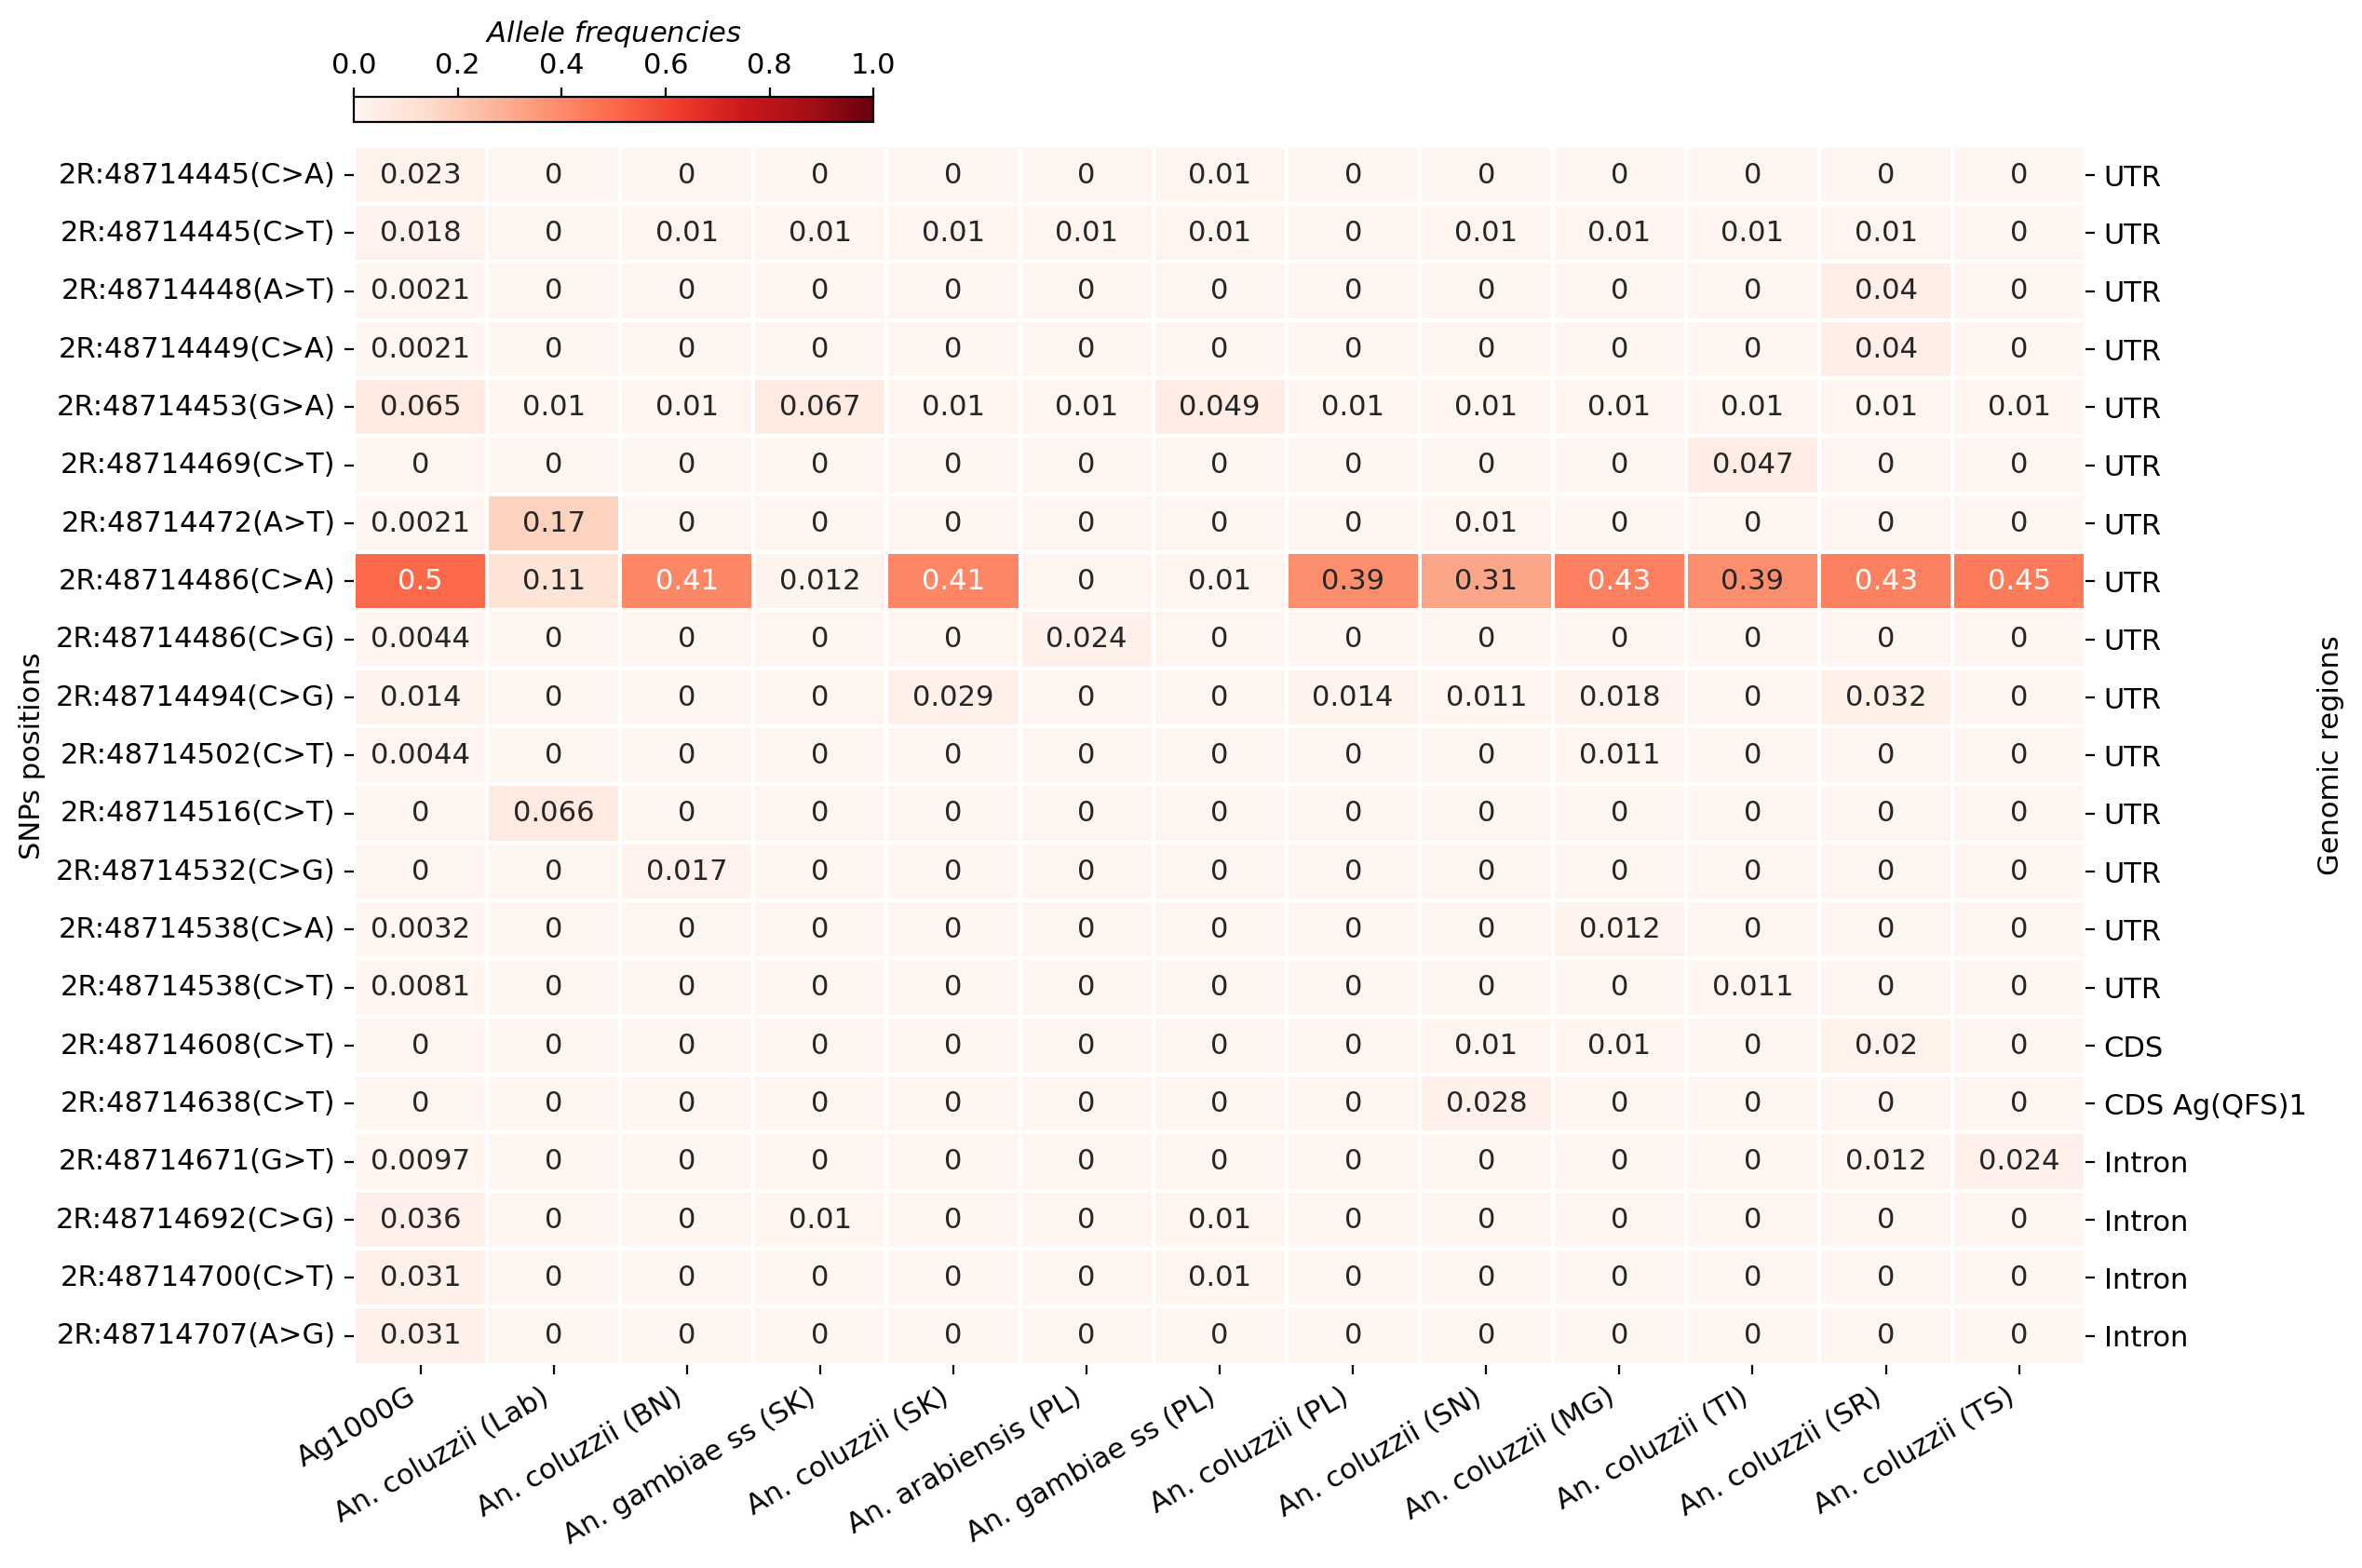

In [99]:
## data handling
dtx = data_dsx.query('max_af > 0.01')
dt1 = dtx.iloc[:,7:20]
dt1[dt1<0.001]=0
dt1[(dt1>0) & (dt1<0.01)]=0.01 
tabx = pd.concat([dtx.iloc[:,:7],dt1],axis=1)

col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G','An. coluzzii (Lab)','An. coluzzii (BN)', 'An. gambiae ss (SK)','An. coluzzii (SK)', 
        'An. arabiensis (PL)', 'An. gambiae ss (PL)', 'An. coluzzii (PL)', 'An. coluzzii (SN)',
        'An. coluzzii (MG)', 'An. coluzzii (TI)', 'An. coluzzii (SR)', 'An. coluzzii (TS)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(tabx)
labels = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,8.5))

# plot
ax1=sns.heatmap(tabx[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax1.set_ylabel("SNPs positions")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax1,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax1.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allele$ $frequencies$')

ax2= ax1.twinx()
ax2.set_ylim([0,ax1.get_ylim()[0]])
ax2.set_yticks(ax1.get_yticks())
labls = ['%s' % (rec.region) for rec in ptl_dsx.records()]
#labls = labels_reg[:-1]
ax2.set_yticklabels(labls[::-1])
ax2.set_ylabel("Genomic regions")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

fig.savefig('Fig. 5X.png', dpi=300, bbox_inches='tight')

#print(ax1.get_ylim())
plt.show()

In [103]:
data_dsx_max_af = data_dsx.query('max_af > 0.01')
s = data_dsx_max_af[['lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
                     'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']]
#s

In [104]:
#s1 = s.copy()
#s1[s1<0.001]=0
#s1[(s1>0) & (s1<0.01)]=0.01
#s1

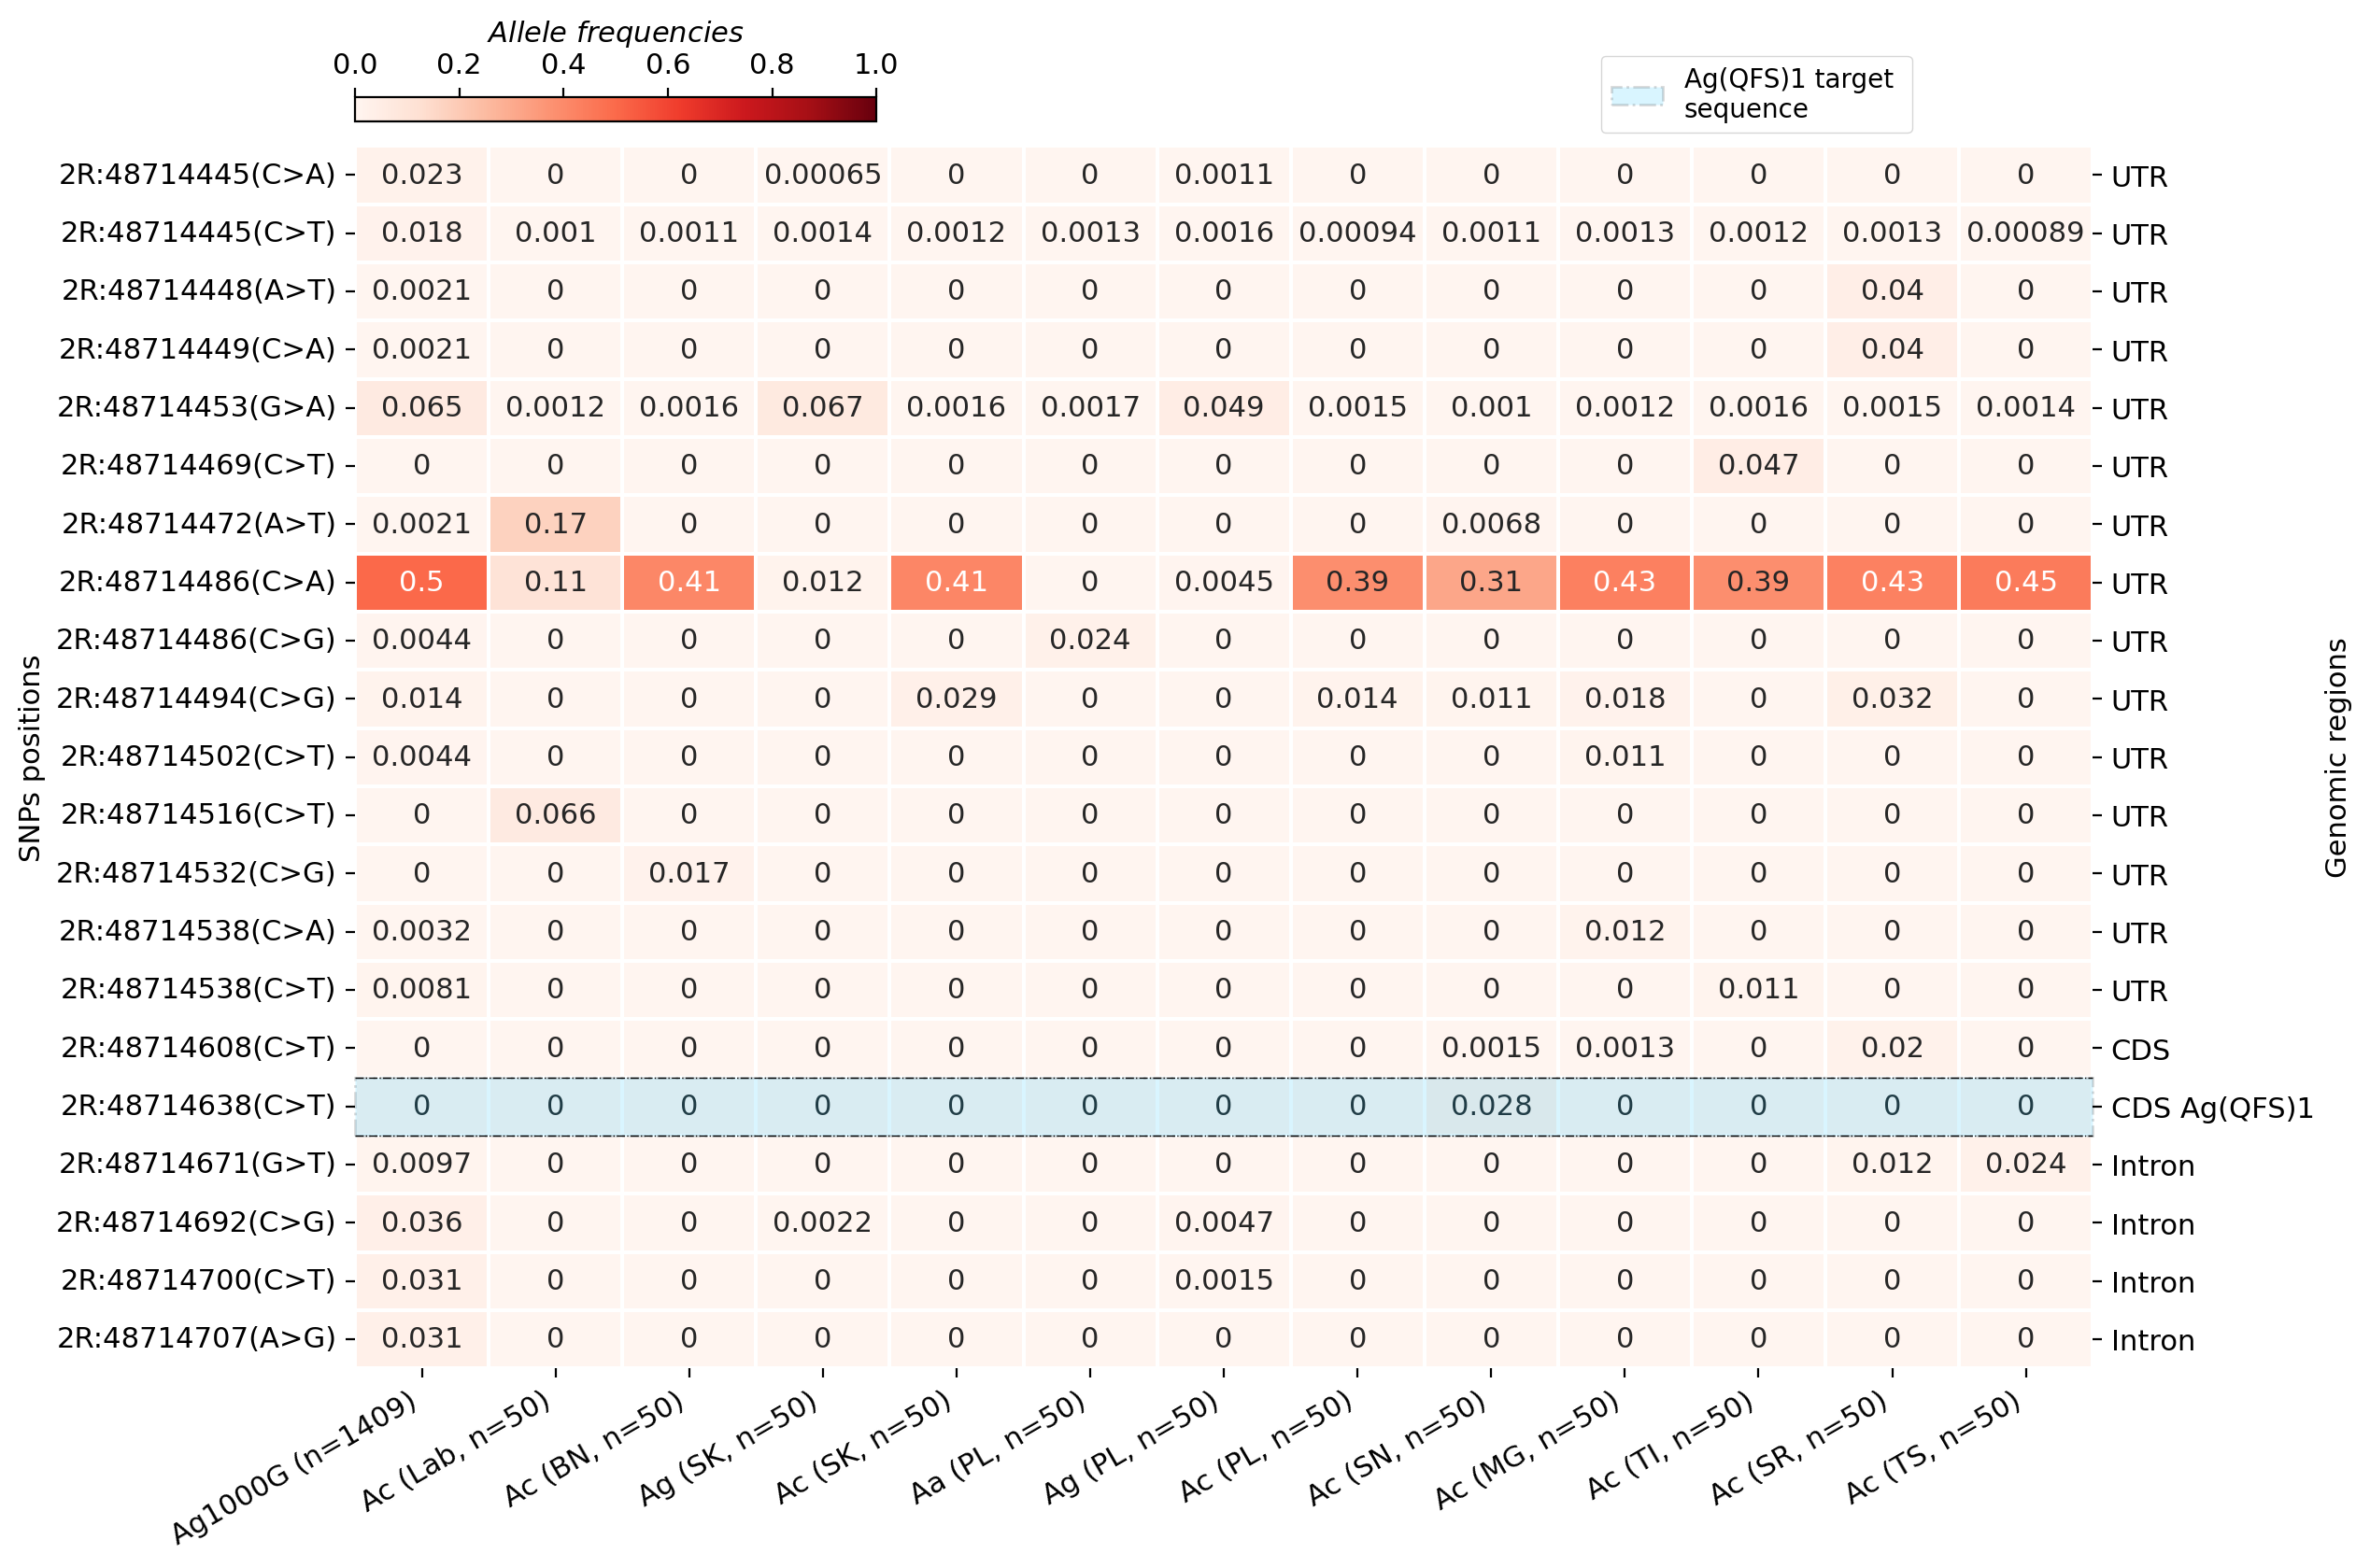

In [105]:
## data handling
data_dsx_max_af = data_dsx.query('max_af > 0.01')
col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G (n=1409)','Ac (Lab, n=50)','Ac (BN, n=50)', 'Ag (SK, n=50)','Ac (SK, n=50)', 
        'Aa (PL, n=50)', 'Ag (PL, n=50)', 'Ac (PL, n=50)', 'Ac (SN, n=50)',
        'Ac (MG, n=50)', 'Ac (TI, n=50)', 'Ac (SR, n=50)', 'Ac (TS, n=50)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(data_dsx_max_af)
labels = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,8.5))

# plot
ax1=sns.heatmap(data_dsx_max_af[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax1.set_ylabel("SNPs positions")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax1,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax1.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allele$ $frequencies$')

ax2= ax1.twinx()
ax2.set_ylim([0,ax1.get_ylim()[0]])
ax2.set_yticks(ax1.get_yticks())
labls = ['%s' % (rec.region) for rec in ptl_dsx.records()]
#labls = labels_reg[:-1]
ax2.set_yticklabels(labls[::-1])
ax2.set_ylabel("Genomic regions")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.axhspan(4, 5, xmax=1, fc='deepskyblue', fill=True, alpha=0.15, ls='dashdot', ec='k', lw=1, 
            label='Ag(QFS)1 target \nsequence', clip_on=False)
plt.axhline(y = 4, xmin=0, xmax=1, ls='dashdot', color='k', clip_on = False)
plt.axhline(y = 5, xmin=0, xmax=1, ls='dashdot', color='k', clip_on = False)

fig.legend(bbox_to_anchor=(0.75, 0.88), loc='lower center', ncol=4,  frameon=True,  fancybox=True, 
           shadow=False)

fig.savefig('Fig. 6.png', dpi=300, bbox_inches='tight')

plt.show()

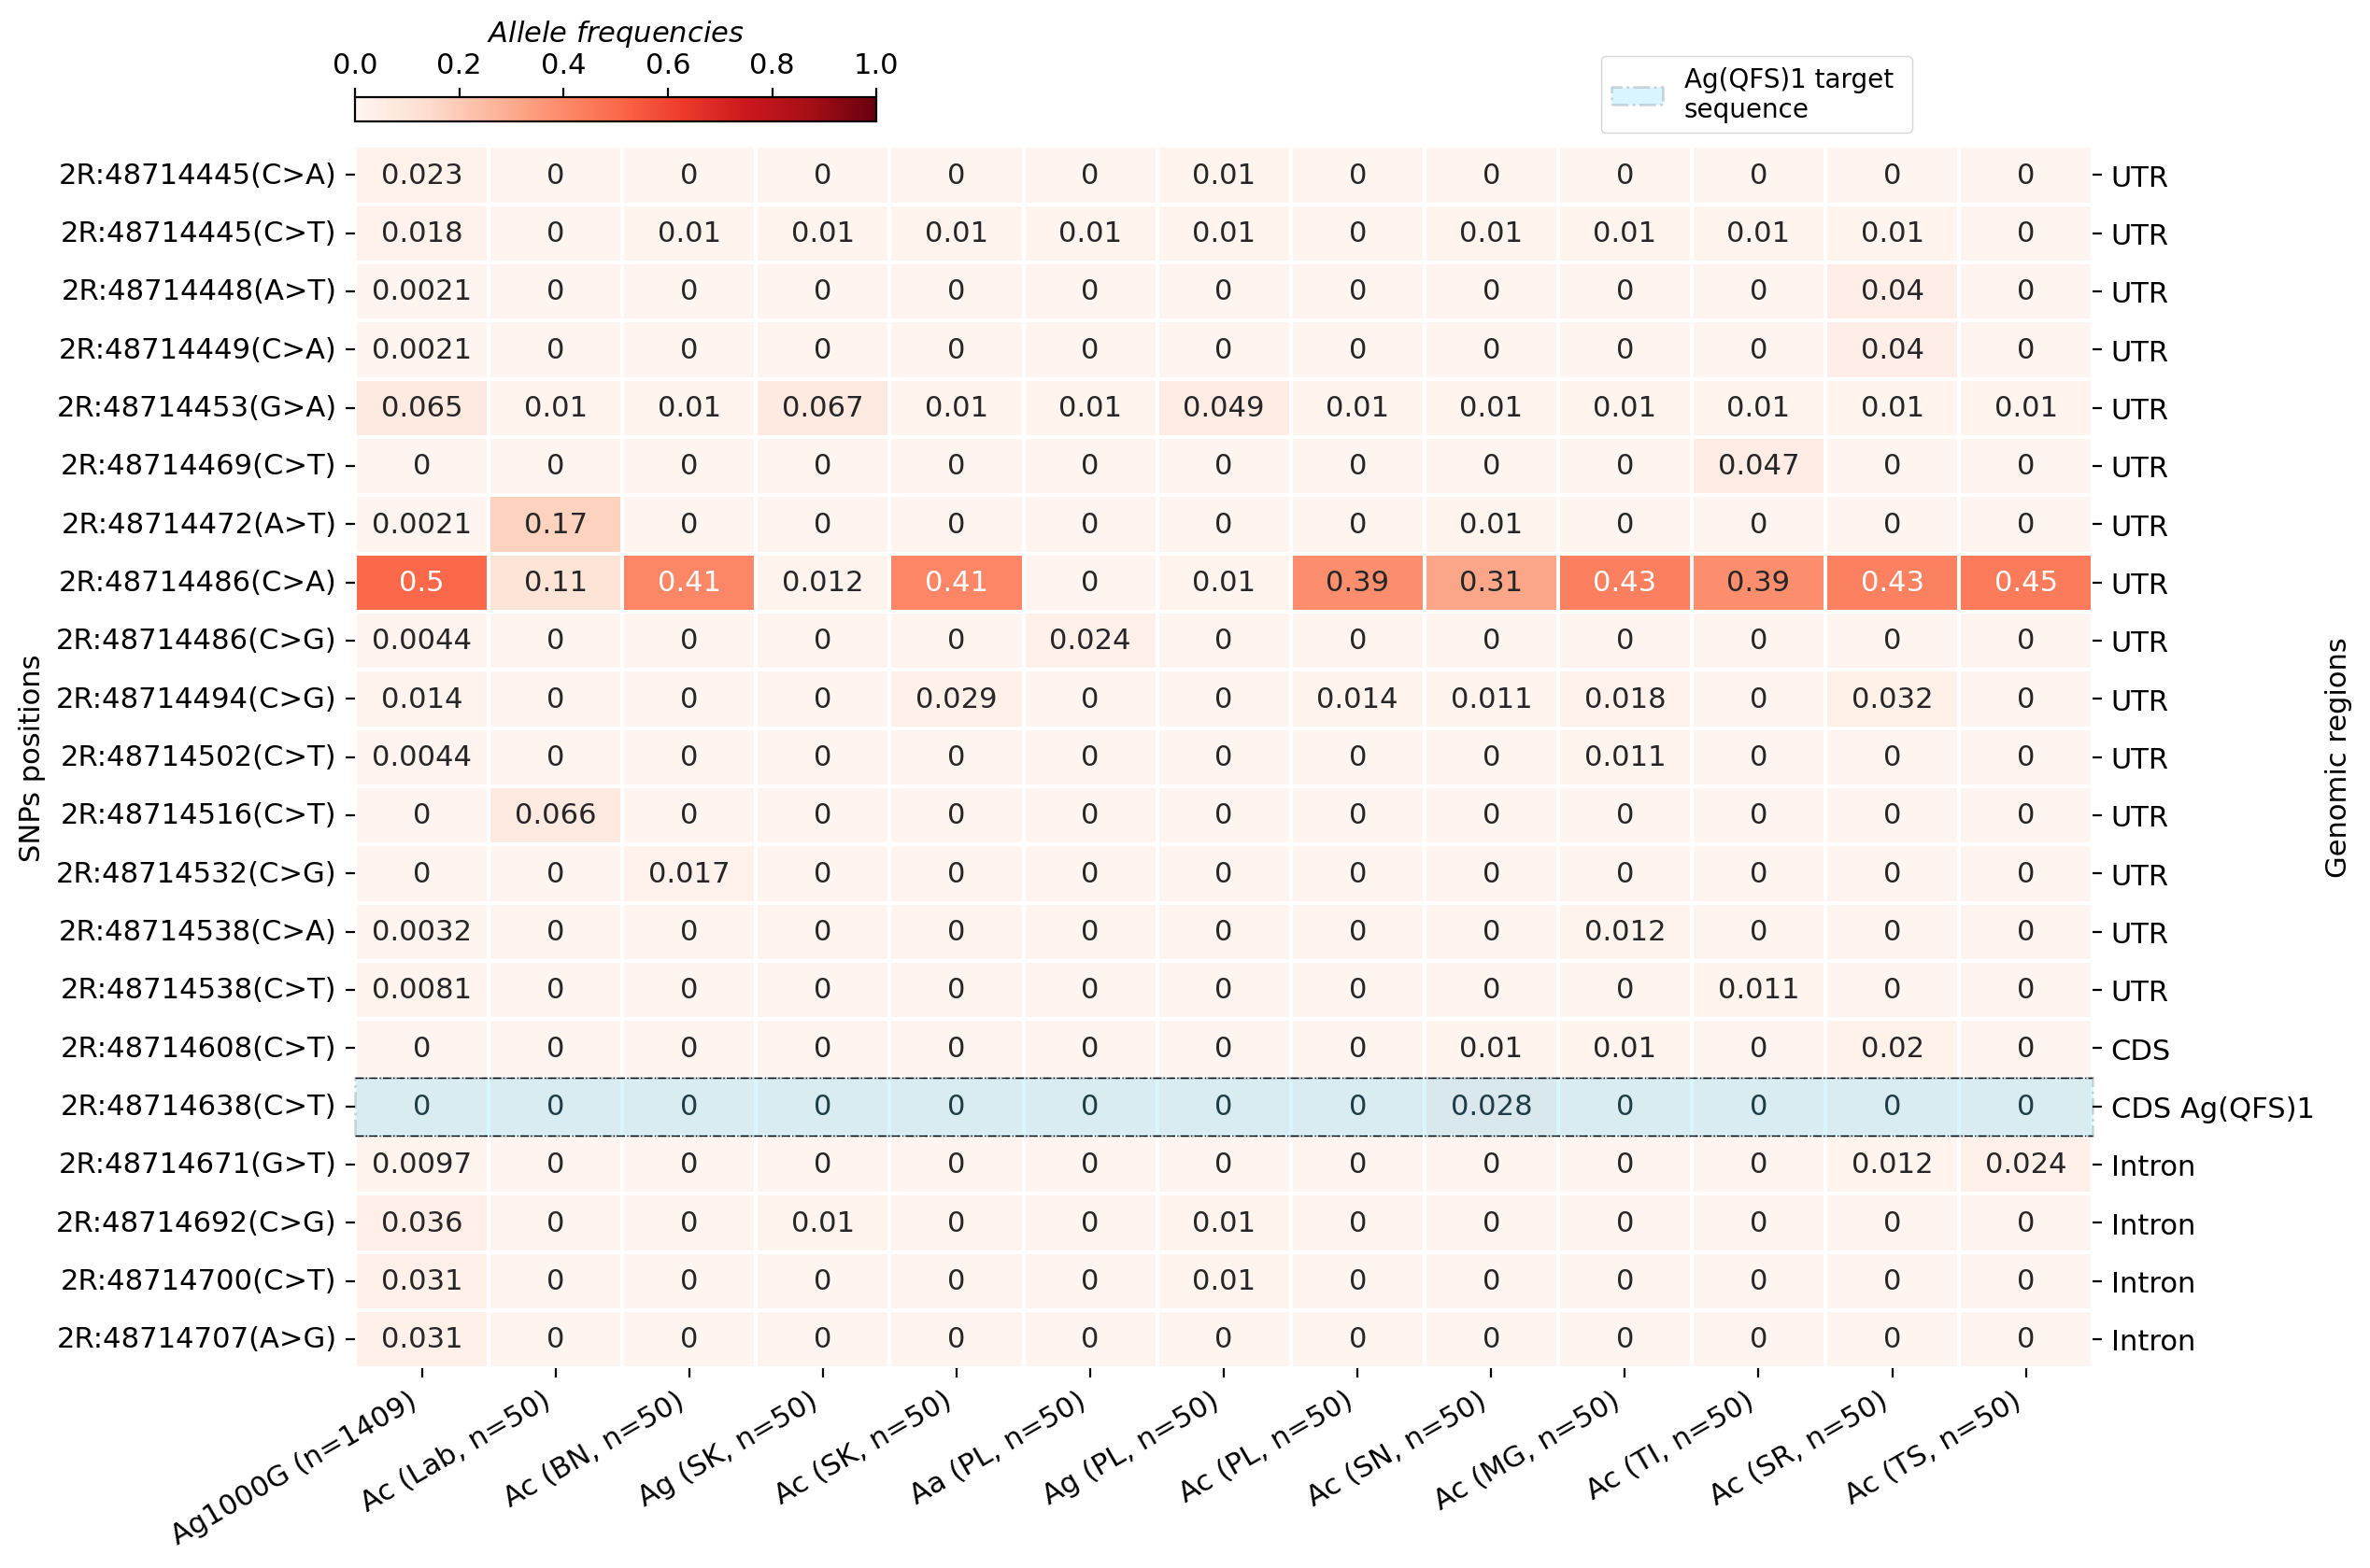

In [116]:
## data handling
dtx = data_dsx.query('max_af > 0.01')
dt1 = dtx.iloc[:,7:20]
dt1[dt1<0.001]=0
dt1[(dt1>0) & (dt1<0.01)]=0.010 
tabx = pd.concat([dtx.iloc[:,:7],dt1],axis=1)

col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G (n=1409)','Ac (Lab, n=50)','Ac (BN, n=50)', 'Ag (SK, n=50)','Ac (SK, n=50)', 
        'Aa (PL, n=50)', 'Ag (PL, n=50)', 'Ac (PL, n=50)', 'Ac (SN, n=50)',
        'Ac (MG, n=50)', 'Ac (TI, n=50)', 'Ac (SR, n=50)', 'Ac (TS, n=50)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(tabx)
labels = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,8.5))

# plot
ax1=sns.heatmap(tabx[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax1.set_ylabel("SNPs positions")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax1,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax1.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allele$ $frequencies$')

ax2= ax1.twinx()
ax2.set_ylim([0,ax1.get_ylim()[0]])
ax2.set_yticks(ax1.get_yticks())
labls = ['%s' % (rec.region) for rec in ptl_dsx.records()]
#labls = labels_reg[:-1]
ax2.set_yticklabels(labls[::-1])
ax2.set_ylabel("Genomic regions")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.axhspan(4, 5, xmax=1, fc='deepskyblue', fill=True, alpha=0.15, ls='dashdot', ec='k', lw=1, 
            label='Ag(QFS)1 target \nsequence', clip_on=False)
plt.axhline(y = 4, xmin=0, xmax=1, ls='dashdot', color='k', clip_on = False)
plt.axhline(y = 5, xmin=0, xmax=1, ls='dashdot', color='k', clip_on = False)

fig.legend(bbox_to_anchor=(0.75, 0.88), loc='lower center', ncol=4,  frameon=True,  fancybox=True, 
           shadow=False)

fig.savefig('Fig. 6X.png', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
#labels_reg = ['%s' % (rec.region) for rec in ptl_dsx.records()]
#labls = labels_reg[::-1]
#labls

In [19]:
#labels_reg[:-1]

In [20]:
## data hanling
data_dsx_max_af = data_dsx.query('max_af > 0.05')
col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G','An. coluzzii (Lab)','An. coluzzii (BN)', 'An. gambiae (SK)','An. coluzzii (SK)', 
        'An. arabiensis (PL)', 'An. gambiae ss (PL)', 'An. coluzzii (PL)', 'An. coluzzii (SN)',
        'An. coluzzii (MG)', 'An. coluzzii (TI)', 'An. coluzzii (SR)', 'An. coluzzii (TS)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(data_dsx_max_af)
labels = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,3))

# plot
ax=sns.heatmap(data_dsx_max_af[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax.set_ylabel("SNPs positions")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax,width="30%", height="5%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allelic$ $frequencies$')

fig.savefig('dsx_amplicom_freq_eng', dpi=300, bbox_inches='tight')

In [21]:
## data hanling
data_dsx_max_af = data_dsx.query('max_af > 0.05')
col = ['Ag1000G', 'lab_sample', 'bana_ac','sk_ag', 'sk_ac', 'pala_aa', 'pala_ag', 'pala_ac', 
       'soni_ac', 'mg_ac','ti_ac', 'saran_ac', 'tosson_ac']
label=['Ag1000G','An. coluzzii (Lab)','An. coluzzii (BN)', 'An. gambiae (SK)','An. coluzzii (SK)', 
        'An. arabiensis (PL)', 'An. gambiae ss (PL)', 'An. coluzzii (PL)', 'An. coluzzii (SN)',
        'An. coluzzii (MG)', 'An. coluzzii (TI)', 'An. coluzzii (SR)', 'An. coluzzii (TS)']
lticks =[0.5,]
for i in range(len(col[:-1])):
    lticks.append(lticks[-1]+1)
ptl_dsx = ptl.fromdataframe(data_dsx_max_af)
labels = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in ptl_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,3))

# plot
ax=sns.heatmap(data_dsx_max_af[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels,xticklabels=label, linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
ax.set_ylabel("Positions des variantes")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax,width="30%", height="5%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Fréquences$ $alléliques$')

fig.savefig('dsx_amplicom_freq_fr', dpi=300, bbox_inches='tight')

In [22]:
df1 = data_dsx.query('pos > 48714637 and pos < 48714660')
df1_dsx = ptl.fromdataframe(df1)
labels1 = ['%s:%s(%s>%s)' % (rec.chrom, rec.pos, rec.ref, rec.alt) for rec in df1_dsx.records()]

### plot allele freqs per alt alleles 
fig = plt.figure(figsize=(12,2.5))

# plot
ax=sns.heatmap(df1[col], vmin=0,vmax=1,cmap=sns.color_palette("Reds", as_cmap=True),
               yticklabels=labels1,linewidths=0.8,linecolor="white",annot=True, cbar=False)
plt.xticks(ticks=lticks, labels=label, rotation=30, ha='right') 
ax.set_ylabel("Variants position")
#ax.set_title("dsx amplicon variants frequencies")

cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=sns.color_palette("Reds", as_cmap=True),
                         label='$Allelic$ $frequencies$')

fig.tight_layout()
#fig.savefig('dsx_amplicom_GD_freq', dpi=300, bbox_inches='tight')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\3713129308.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [23]:
##
df1 = data_dsx.query('pos > 48714637 and pos < 48714660')
df1[col]

,Ag1000G,lab_sample,bana_ac,sk_ag,sk_ac,pala_aa,pala_ag,pala_ac,soni_ac,mg_ac,ti_ac,saran_ac,tosson_ac
70,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028293,0.0,0.0,0.0,0.0
71,0.004425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
72,0.005952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
73,0.003226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## SNP density 

In [24]:
n_SNPs, density = [], []
for i in col:
    n_SNPs.append(np.count_nonzero(data_dsx[f'{i}']))
    density.append(np.count_nonzero(data_dsx[f'{i}'])/291)

ldict = {'site':col, 'nSNPs':n_SNPs, 'density':density}
df_snps = pd.DataFrame(ldict)

In [25]:
### plot allele freqs per alt alleles 
rcParams['axes.linewidth'] = 0.8 
x1 = np.arange(len(col[:-1]))-0.25
y1 = list(df_snps.iloc[1:,].density)
lab = [f'n={i}' for i in df_snps.nSNPs]
##
fig = plt.figure(figsize=(6,5))
ax = plt.bar(df_snps.iloc[1:,].site, df_snps.iloc[1:,].density, width =0.5, color='maroon')
plt.ylim(0,0.1)
plt.ylabel('Variants density (bp$^{-1}$)')
plt.xticks(ticks=np.arange(len(col[:-1])),labels=label[1:], rotation=30, ha='right')
for i in range(len(col[:-1])):
    plt.text(x = x1[i], y = y1[i]+0.0015, s = lab[1:][i], size=8)

    
fig.tight_layout()
#fig.savefig('snp_num.png', dpi=300, bbox_inches='tight')

In [26]:
### plot allele freqs per alt alleles 
rcParams['axes.linewidth'] = 0.8 
x1 = np.arange(len(col[:-1]))-0.25
y1 = list(df_snps.iloc[1:,].density)
lab = [f'n={i}' for i in df_snps.nSNPs]
##
fig = plt.figure(figsize=(6,5))
ax = plt.bar(df_snps.iloc[1:,].site, df_snps.iloc[1:,].density, width =0.5, color='maroon')
plt.ylim(0,0.1)
plt.ylabel('Dansité des SNPs (bp$^{-1}$)')
plt.xticks(ticks=np.arange(len(col[:-1])),labels=label[1:], rotation=30, ha='right')
for i in range(len(col[:-1])):
    plt.text(x = x1[i], y = y1[i]+0.0015, s = lab[1:][i], size=8)

    
fig.tight_layout()
fig.savefig('snp_num_fr.png', dpi=300, bbox_inches='tight')

In [29]:
#df_snps.density.min(), df_snps.iloc[1:,].density.max(), df_snps.iloc[1:,].density.mean(), 

In [30]:
### plot allele freqs per alt alleles 
rcParams['axes.linewidth'] = 0.8 
x1 = np.arange(len(col))-0.25
y1 = list(df_snps.density)
lab = [f'n={i}' for i in df_snps.nSNPs]
##
fig = plt.figure(figsize=(6,5))
ax = plt.bar(df_snps.site, df_snps.density, width =0.5, color='maroon')
plt.ylim(0,0.25)
plt.ylabel('variants density (bp$^{-1}$)')
plt.xticks(ticks=np.arange(len(col)),labels=label, rotation=30, ha='right')
for i in range(len(col)):
    plt.text(x = x1[i], y = y1[i]+0.0015, s = lab[i], size=8)

    
fig.tight_layout()
#fig.savefig('snp_num.png', dpi=300, bbox_inches='tight')

# Plotting the distribution of the SNPs and their frequencies alongside the 2R chrom

In [31]:
## Let's acces to the data
ag3 = malariagen_data.Ag3()

# Fru region
dsx_region = ('2R', 48703664 , 48792262)

## reference genome
df_geneset = ag3.geneset().set_index("ID")
#df_geneset

## let's access to the reference transcript of the gene AGAP000080
df_geneset.query("Parent == 'AGAP004050'")

## let's choose a transcripts
transcrit_id = 'AGAP004050-RA', 'AGAP004050-RB'
#transcrit_id

dsx_genset = df_geneset.loc[(df_geneset.index == 'AGAP004050')|
                           (df_geneset.index.isin(transcrit_id))|
                           (df_geneset.Parent.isin(transcrit_id))]
gene_id = list(dsx_genset.index)
dsx_genset.insert(8, 'gene_id', gene_id)
dsx_genset = dsx_genset.fillna(0) 

In [32]:
def transcript_dataset(data, transcript):
    'This function compute the dataset of each transcript'
    for idx in data.index:
        if idx == transcript:
            val = data.index.get_loc(idx)
            transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
    return transcript_data

dsx_RB = transcript_dataset(dsx_genset, 'AGAP004050-RB')
dsx_RA = transcript_dataset(dsx_genset, 'AGAP004050-RA')

loc_RA = ('2R',48788460, 48703664)
loc_RB = ('2R',48788460, 48703664)

pcr = ('2R', 48714420, 48714720)
exon = ('2R', 48747692, 48747738)
gd_site = ('2R', 48714637, 48714660)
cut_site = 48714642
gds = ('2R', 48714637, 48714660)

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and

In [33]:
def plot_transcripts(geneset, height=.5, label_transcripts=True, label_exons=False, label_exon_size=False,
                     label_codons=False, highlight_exons=None, label_cdss=False, highlight_color='red', ax=None,
                     title=None, xlim=None, exon_label='{}', spec_pos=None, region_name=None, btb=None, 
                     btb_name = None, include_transcripts=None):
    """Plot all transcripts for one or all genes overlapping a given region."""

    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, left=True, bottom=True)
        
    if title:
        ax.set_title(title, va='bottom')
    # find genes overlapping the given region 
    genes = geneset.query("(type == 'gene')").sort_values('start')

    # iterate over genes
    for _, gene in genes.iterrows():

        # find child transcripts
        transcripts = geneset.query("(type == 'mRNA') and (Parent == %r)" % gene.gene_id).sort_values('gene_id')

        # iterate over transcripts
        for i, (_, transcript) in enumerate(transcripts.iterrows()):
            if include_transcripts is not None and transcript.gene_id not in include_transcripts:
                continue
            
            # coordinates for plotting the transcript
            if transcript.strand == '+':
                y = i
            else:
                y = -i - 1

            # annotate with transcript ID
            
            if xlim is not None:
                start, stop = xlim
                text_y = y + height + (height / 10)
                if label_transcripts == 'right':
                    text_x = min(stop, transcript.end)
                    ha = 'right'
                else:
                    text_x = max(start, transcript.start)
                    ha = 'left'
                if label_transcripts:
                    if transcript.strand == '+':
                        text = '%s >' % transcript.gene_id
                    else:
                        text = '< %s' % transcript.gene_id
                    ax.text(text_x, text_y, text, ha=ha, va='bottom', size=6)
            
            # find child exons
            exons = geneset.query("type == 'exon' and Parent == %r" % transcript.gene_id).sort_values('start')
            
            # iterate over exons to plot introns
            last_exon = None
            for i, (_, exon) in enumerate(exons.iterrows()):
                x = exon.start
                width = exon.end - x

                # plot intron
                if last_exon is not None:
                    ax.plot([last_exon.end, (last_exon.end + exon.start) / 2, exon.start], [y + height / 2, y + height / 1.5, y + height / 2], 'gray')
                last_exon = exon
                
                # exon number
                n = i + 1 if exon.strand == '+' else len(exons) - i

            # find child CDSs
            cdss = geneset.query("type == 'CDS' and Parent == %r" % transcript.gene_id)
            if transcript.strand == '+':
                cdss = cdss.sort_values('start', ascending=True)
            else:
                cdss = cdss.sort_values('end', ascending=False)
                
            # keep track of CDS position
            cds_pos = 0
            
            # plot CDSs
            for _, cds in cdss.iterrows():
                x = cds.start
                width = cds.end - x
                
                # plot CDS
                patch = plt.Rectangle((x, y), width, height, color='darkgray')
                ax.add_patch(patch)
                
                # accumulate CDS positions
                cds_pos += width + 1  

            # find child UTRs
            utrs = geneset.query("(type == 'three_prime_UTR' or type == 'five_prime_UTR') and Parent == %r" % transcript.gene_id).sort_values('start')
            for _, utr in utrs.iterrows():
                x = utr.start
                width = utr.end - x
                utr_height = height#* .8
                utr_y = y + (height - utr_height) / 2
                patch = plt.Rectangle((x, utr_y), width, utr_height, color='darkred')
                ax.add_patch(patch)

            # plot exons
            if transcript.strand == '+':
                exons = exons.sort_values('start', ascending=True)
            else:
                exons = exons.sort_values('end', ascending=False)
            for i, (_, exon) in enumerate(exons.iterrows()):
                x = exon.start
                width = exon.end - x
                exon_height = height#* .8
                exon_y = y + (height - exon_height) / 2
                patch = plt.Rectangle((x, exon_y), width, exon_height, facecolor='none', edgecolor='k', linewidth=0.01)
                ax.add_patch(patch)

                # label exons
                if label_exons == transcript.gene_id and xlim is not None:
#                     text_y = y - height/10
                    text_y = y + height/2
                    start, stop = xlim
                    if exon.end > start and exon.start < stop:
                        if exon.start < start:
                            text_x = (start + exon.end) / 2
                        elif exon.end > stop:
                            text_x = (exon.start + stop) / 2
                        else:
                            text_x = (exon.start + exon.end) / 2
                        s = exon_label.format(i + 1)
                        ax.text(text_x, text_y, s, ha='center', va='center', color='k', zorder=20)
    #plot specific region
    s=0
    for tr in sorted(geneset.Parent.unique()[2:]):
        s += -1
        gen_Ri = transcript_dataset(geneset, f'{tr}')
        if tr == sorted(geneset.Parent.unique()[2:])[-1]:
            if gen_Ri.end[1]>gen_Ri.end[1]-2 and spec_pos:
                ax.add_patch(Rectangle((spec_pos[0], s), spec_pos[1]-spec_pos[0], exon_height, edgecolor='darkgoldenrod', 
                                        fill=False, lw=1, label=f'{region_name}'))
            if btb:
                ax.add_patch(Rectangle((btb[0], s), btb[1]-btb[0], exon_height, edgecolor='magenta',
                                       fill=False, lw=1, label=f'{btb_name}'))
        else:
            if gen_Ri.end[1]>gen_Ri.end[1]-2 and spec_pos:
                ax.add_patch(Rectangle((spec_pos[0], s), spec_pos[1]-spec_pos[0], exon_height, edgecolor='darkgoldenrod', 
                                        fill=False, lw=1))
            if btb:
                ax.add_patch(Rectangle((btb[0], s), btb[1]-btb[0], exon_height, edgecolor='magenta',
                                       fill=False, lw=1))
    ax.set_yticks([])
    if xlim:
        ax.set_xlim(*xlim)
        ax.set_xticks([])
        ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks()])
        ax.autoscale(axis='y', tight=False)

In [34]:
plot_transcripts(dsx_RB)
plot_transcripts(dsx_RB, xlim=pcr[1:], spec_pos=pcr[1:], btb=exon[1:])

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and

In [36]:
def plot_af(x=data_dsx.pos, y=data_dsx.max_af, xlim = (48714420, 48714720), ylim=(0, 1), ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 2))
        sns.despine(ax=ax, offset=5)
    
    
    ax.plot(x, y, linestyle='-', marker=None, color='darkgreen', linewidth=0.4)
    ax.set_ylabel('Allelic frequencies')
    ax.set_xlabel('Genome position (bp)')
    
    # tidy up
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])

plot_af()

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\3605308870.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


In [37]:
def plot_afx(x = data_dsx.pos, y=data_dsx.max_af1, y1= None, y2=None, xlim = (48714420, 48714720), ylim=(0, 1), 
             lab1='BF data', lab12='An. arabiensis', lab_y='Allelic frequencies', lab_x='Chromosome 2R (bp)', 
             lab2='Ag1000G data', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 2))
    sns.despine(ax=ax, offset=5)

    ax.plot(x, y, linestyle='-', marker='.', markersize=4, color='darkgreen', linewidth=0.3, mew=1, label=f'{lab1}')
    if y1:
        ax.plot(x, y1, linestyle='-', marker='x', markersize=4, color='maroon', linewidth=0.3, mew=1, label=f'{lab2}')
    if y2:
        ax.plot(x, y2, linestyle='-', marker='^', color='cyan', linewidth=0.3, mew=1, label=f'{lab12}')
    ax.set_ylabel(f'{lab_y}')
    ax.set_xlabel(f'{lab_x}')
    
    # tidy up
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])

plot_afx(y1=list(data_dsx.Ag1000G), y2 = list(data_dsx.pala_aa))

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


In [38]:
def plot_freq(data = dsx_RB, y1=None, x1=data_dsx.pos, y2= data_dsx.max_af1, xlim = pcr, ylim=(0, 1), figsize=(9, 3), exon_label='{}', 
              target=None, target_label=None, spec_pos=None, legend=True, region_name=None, btb=None, btb_name=None, r1=0.12, r2=1.5, 
              fig_name = None,lab_y='Allelic frequencies', lab_x='Chromosome 2R (bp)', lab1='Amplicon \nseq. data', 
              lab2='Ag1000G data',):
    '''
    This function plot the Nucleotide diversity, conservation score, the transcript 
    on the same axe.
    '''
    gs = plt.GridSpec(nrows=2, ncols=1, height_ratios=(r1, r2))
    
    fig = plt.figure(figsize=figsize)
    
    # plot the gene model
    ax = fig.add_subplot(gs[0])
    plot_transcripts(data, ax=ax, xlim=xlim[1:], spec_pos=spec_pos, label_exons=f'{data.index[1]}', 
                     region_name=region_name, btb=btb, exon_label=exon_label)
    
    #plot stop
    if target:
        if type(target) == int:
            ax.axvline(x=target, ymin=0, ymax=1, color='red', linestyle='-', label=f'{target_label}')
        else:
            for target_pos in target[0:-1]:
                ax.axvline(x=target_pos, ymin=0, ymax=1, color='red', linestyle='-')
            ax.axvline(x=target_pos, ymin=0, ymax=1, color='red', linestyle='--', label=f'{target_label}')
    ax.set_xlim(*xlim[1:])
    
    # plot alleic frequency
    ax = fig.add_subplot(gs[1])
    plot_afx(x = x1, y=y2, y1= y1, xlim = xlim[1:], ylim=ylim, ax=ax, lab1=lab1, lab2=lab2,
            lab_y=lab_y, lab_x=lab_x)
    
    #legend and layout
    if legend is True:
        fig.legend(bbox_to_anchor=(0.5, -0.15), loc='lower center', ncol=4,  frameon=True,  fancybox=True, 
                   shadow=False)
    fig.tight_layout()
    
    if fig_name:
        fig.savefig(f'{fig_name}', dpi=300, bbox_inches='tight')

In [39]:
plot_freq(xlim = pcr, y1=list(data_dsx.Ag1000G), x1=data_dsx.pos, y2= data_dsx.max_af1, spec_pos=gd_site[1:], target=cut_site, 
          exon_label='', region_name='GD target \nsequence', target_label='GD cutting site', fig_name='allelic_freq_GD.png')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


In [ ]:
#freq_data_1.position

In [40]:
plot_freq(xlim = pcr, y1=list(freq_data_1.max_acf1), x1=freq_data_1.position, y2= freq_data_1.max_agf1, spec_pos=gd_site[1:], 
          target=cut_site, exon_label='', region_name='GD target \nsequence', target_label='GD cutting site', fig_name='Ag_Ac_freq_GD.png',
          lab1='$An. gambiae$ s.s.', lab2='$An. coluzzii$')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


In [41]:
plot_freq(xlim = pcr, y1=list(freq_data_1.max_acf1), x1=freq_data_1.position, y2= freq_data_1.max_agf1, spec_pos=gd_site[1:], 
          target=cut_site, exon_label='', region_name='Site cible du GD', target_label='Site de coupure du GD', 
          fig_name='Ag_Ac_freq_GD_fr.png', lab1='$An. gambiae$ s.s.', lab2='$An. coluzzii$', lab_y='Fréquences \nalléliques')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


In [42]:
def plot_freq12(data = dsx_RB, y1=None, x1=data_dsx.pos, y2= data_dsx.max_af1, xlim = pcr, ylim=(0, 1), figsize=(9, 3), exon_label='{}', 
              target=None, target_label=None, spec_pos=None, legend=True, region_name=None, btb=None, btb_name=None, r1=0.12, r2=1.5, 
              fig_name = None, lab_y='Allelic frequencies', lab_x='Chromosome 2R (bp)', lab1='Amplicon \nseq. data', 
              lab2='Ag1000G data', lab3='CRISPR/Cas9 \ntarget sequence', gd = gds, av1=None):
    '''
    This function plot the Nucleotide diversity, conservation score, the transcript 
    on the same axe.
    '''
    gs = plt.GridSpec(nrows=2, ncols=1, height_ratios=(r1, r2))
    
    fig = plt.figure(figsize=figsize)
    
    # plot the gene model
    ax = fig.add_subplot(gs[0])
    plot_transcripts(data, ax=ax, xlim=xlim[1:], spec_pos=spec_pos, label_exons=f'{data.index[1]}', 
                     region_name=region_name, btb=btb, exon_label=exon_label)
    
    # shading 
    if av1:
        ax.axvspan(gd[1], gd[2], color='magenta', alpha=0.12, ls='--', ec='k', lw=0.3)
    
    #plot stop
    if target:
        if type(target) == int:
            ax.axvline(x=target, ymin=0, ymax=1, color='red', ls='--', lw=0.9, label=f'{target_label}')
        else:
            for target_pos in target[0:-1]:
                ax.axvline(x=target_pos, ymin=0, ymax=1, color='red', ls='-')
            ax.axvline(x=target_pos, ymin=0, ymax=1, color='red', ls='--', lw=0.9, label=f'{target_label}')
    ax.set_xlim(*xlim[1:])
    
    # plot alleic frequency
    ax = fig.add_subplot(gs[1])
    plot_afx(x = x1, y=y2, y1= y1, xlim = xlim[1:], ylim=ylim, ax=ax, lab1=lab1, lab2=lab2,
            lab_y=lab_y, lab_x=lab_x)
    
    ## shading 
    if av1:
        ax.axvspan(gd[1], gd [2], color='magenta', alpha=0.1, lw=0.3, label=lab3)
    
    #legend and layout
    if legend is True:
        fig.legend(bbox_to_anchor=(0.5, -0.15), loc='lower center', ncol=4,  frameon=True,  fancybox=True, 
                   shadow=False)
    fig.tight_layout()
    
    #plt.axvspan(gd[1], gd [2], ymax=1.5, color='magenta', alpha=0.1, ls='--', ec='k', lw=0.3, label=lab3, clip_on=False)
    
    if fig_name:
        fig.savefig(f'{fig_name}', dpi=300, bbox_inches='tight')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


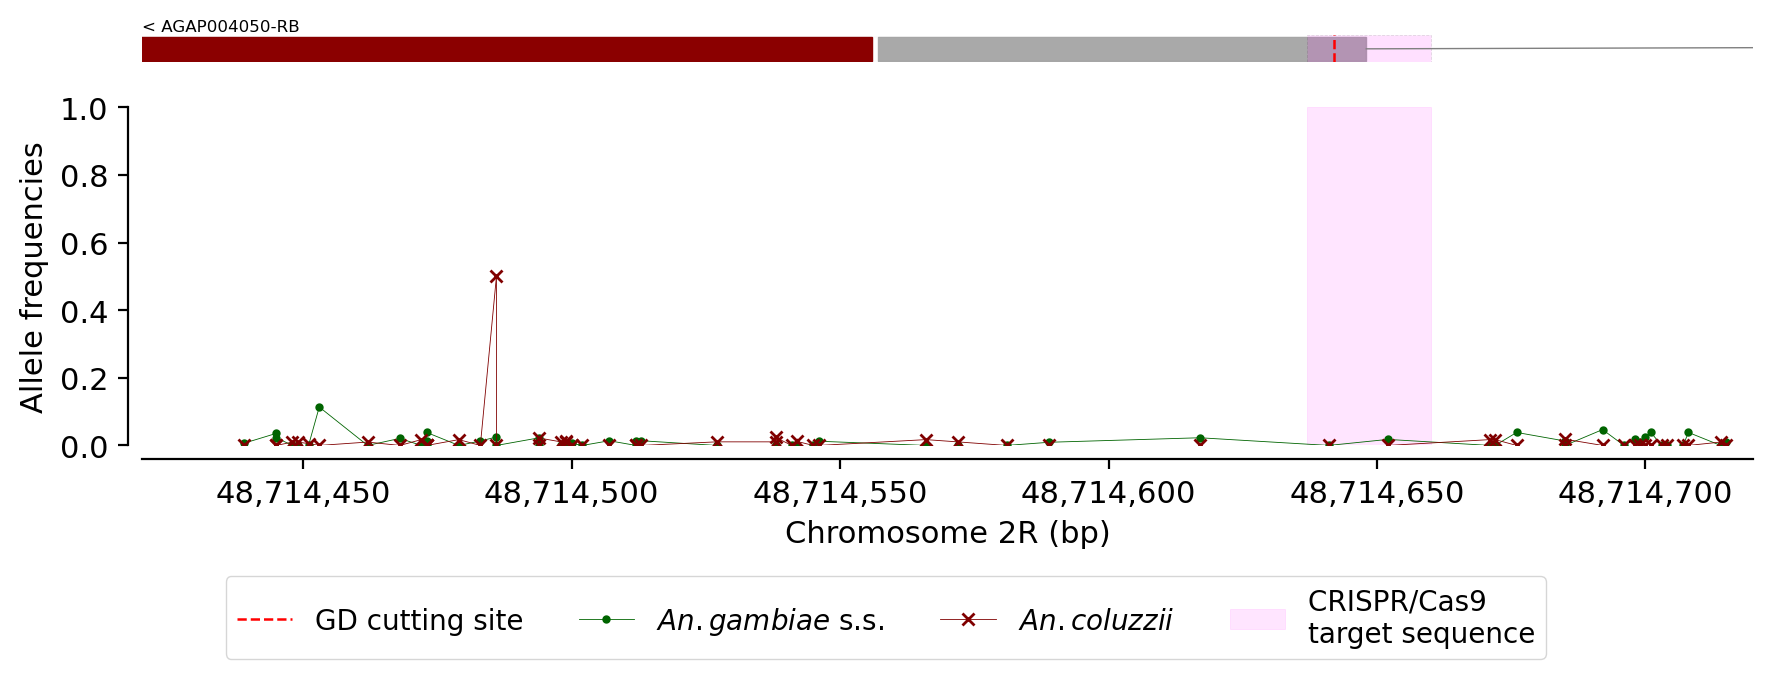

In [113]:
plot_freq12(xlim = pcr, y1=list(freq_data_1.max_acf1), x1=freq_data_1.position, y2= freq_data_1.max_agf1, target=cut_site, 
            exon_label='', target_label='GD cutting site', lab1='$An. gambiae$ s.s.', lab2='$An. coluzzii$', 
            lab_y='Allele frequencies', gd = gds, av1=True, fig_name = 'allelic_freq_GD123.png')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


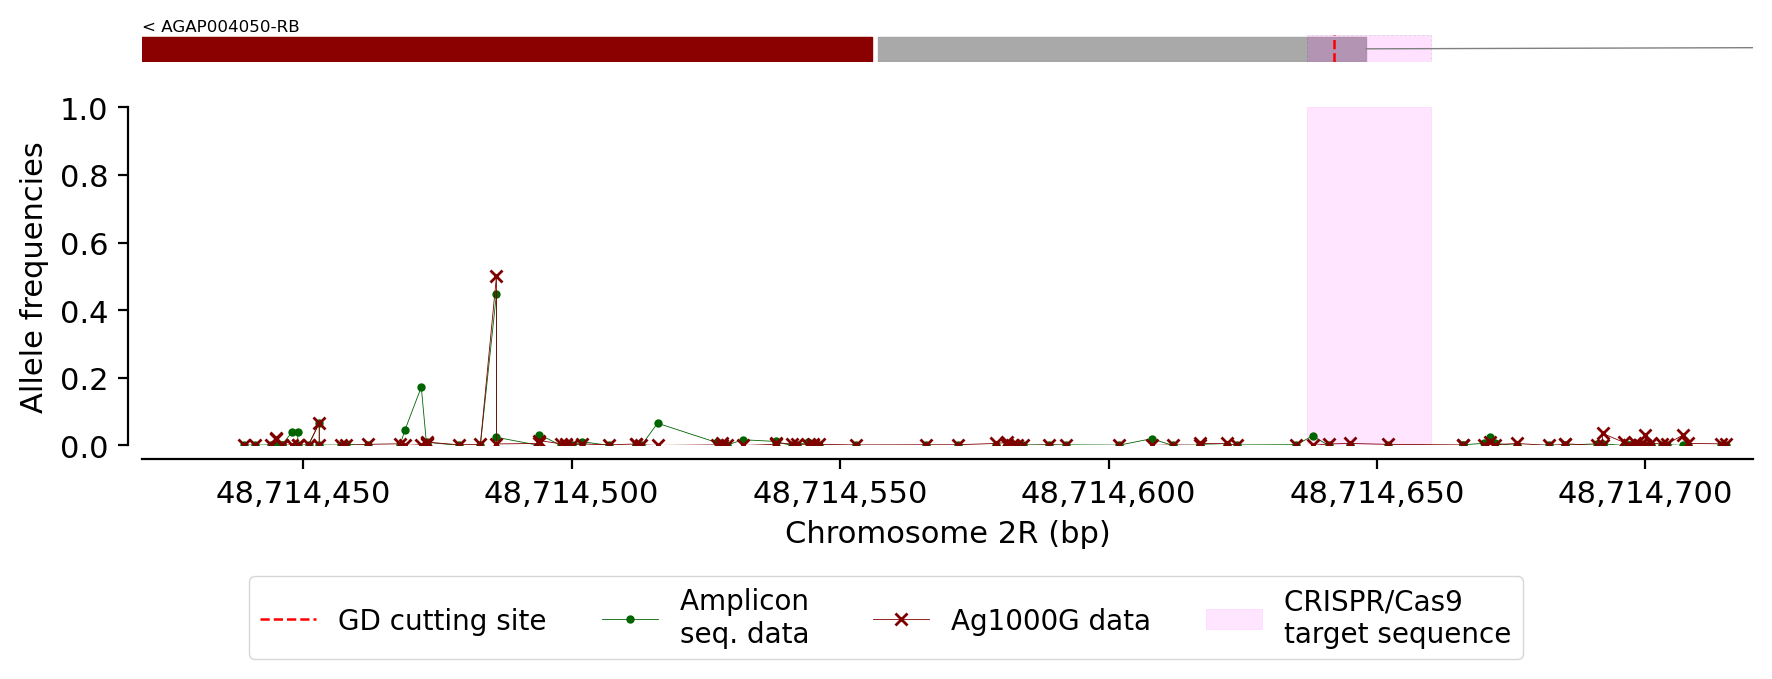

In [114]:
plot_freq12(xlim = pcr, y1=list(data_dsx.Ag1000G), x1=data_dsx.pos, y2= data_dsx.max_af1, gd = gds,target=cut_site,
            exon_label='', target_label='GD cutting site', lab_y='Allele frequencies', av1=True, 
            fig_name='allelic_freq_GD12.png')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


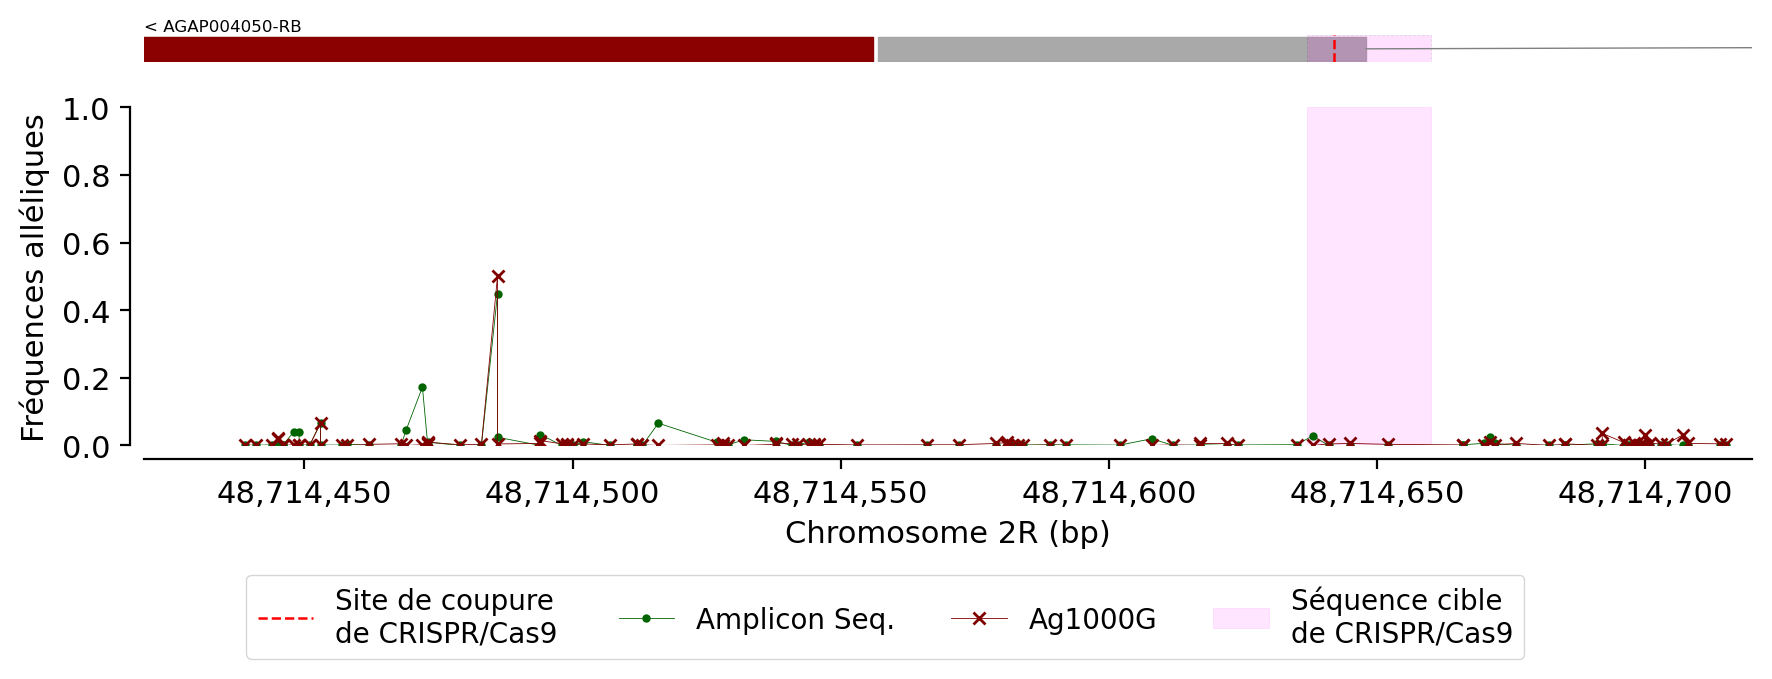

In [115]:
plot_freq12(xlim = pcr, y1=list(data_dsx.Ag1000G), x1=data_dsx.pos, y2= data_dsx.max_af1, gd = gds,target=cut_site,
            exon_label='', target_label='Site de coupure \nde CRISPR/Cas9', lab_y='Fréquences alléliques', av1=True, 
            fig_name='allelic_freq_GD12_fr.png', lab1="Amplicon Seq.", lab2="Ag1000G",
            lab3='Séquence cible \nde CRISPR/Cas9')


In [108]:
def plot_freq123(data = dsx_RB, y1=None, x1=data_dsx.pos, y2= data_dsx.max_af1, xlim = pcr, ylim=(0, 1), figsize=(9, 3), exon_label='{}', 
              target=None, target_label=None, spec_pos=None, legend=True, region_name=None, btb=None, btb_name=None, r1=0.12, r2=1.5, 
              fig_name = None, lab_y='Allelic frequencies', lab_x='Chromosome 2R (bp)', lab1='Amplicon \nseq. data', 
              lab2='Ag1000G data', lab3='CRISPR/Cas9 \ntarget sequence', gd = gds):
    '''
    This function plot the Nucleotide diversity, conservation score, the transcript 
    on the same axe.
    '''
    gs = plt.GridSpec(nrows=2, ncols=1, height_ratios=(r1, r2))
    
    fig = plt.figure(figsize=figsize)
    
    # plot the gene model
    ax = fig.add_subplot(gs[0])
    plot_transcripts(data, ax=ax, xlim=xlim[1:], spec_pos=spec_pos, label_exons=f'{data.index[1]}', 
                     region_name=region_name, btb=btb, exon_label=exon_label)
    
    # shading 
    #if av1:
    #    ax.axvspan(gd[1], gd[2], color='magenta', alpha=0.12, lw=0.3)
    
    #plot stop
    if target:
        if type(target) == int:
            ax.axvline(x=target, ymin=0, ymax=1, color='red', ls='--', lw=0.9, label=f'{target_label}')
        else:
            for target_pos in target[0:-1]:
                ax.axvline(x=target_pos, ymin=0, ymax=1, color='red', ls='-')
            ax.axvline(x=target_pos, ymin=0, ymax=1, color='red', ls='--', lw=0.9, label=f'{target_label}')
    ax.set_xlim(*xlim[1:])
    
    # plot alleic frequency
    ax = fig.add_subplot(gs[1])
    plot_afx(x = x1, y=y2, y1= y1, xlim = xlim[1:], ylim=ylim, ax=ax, lab1=lab1, lab2=lab2,
            lab_y=lab_y, lab_x=lab_x)
    
    fig.tight_layout()
    
    ## shading 
    #if av1:
    #    ax.axvspan(gd[1], gd [2], color='magenta', alpha=0.1, ls='-', lw=0.3, label=lab3)
        
    plt.axvspan(gd[1], gd [2], ymax=1.25, fc='dodgerblue', fill=False, alpha=0.15, ls='dashdot', ec='k', lw=1, 
                label=lab3, clip_on=False)
    plt.axvline(x = 48714637, ymin=0, ymax=1.25, ls='dashdot', color='k', clip_on = False)
    plt.axvline(x = 48714660, ymin=0, ymax=1.25, ls='dashdot', color='k', clip_on = False)
    
    #legend and layout
    if legend is True:
        fig.legend(bbox_to_anchor=(0.5, -0.15), loc='lower center', ncol=4,  frameon=True,  fancybox=True, 
                   shadow=False)
    
    if fig_name:
        fig.savefig(f'{fig_name}', dpi=300, bbox_inches='tight')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


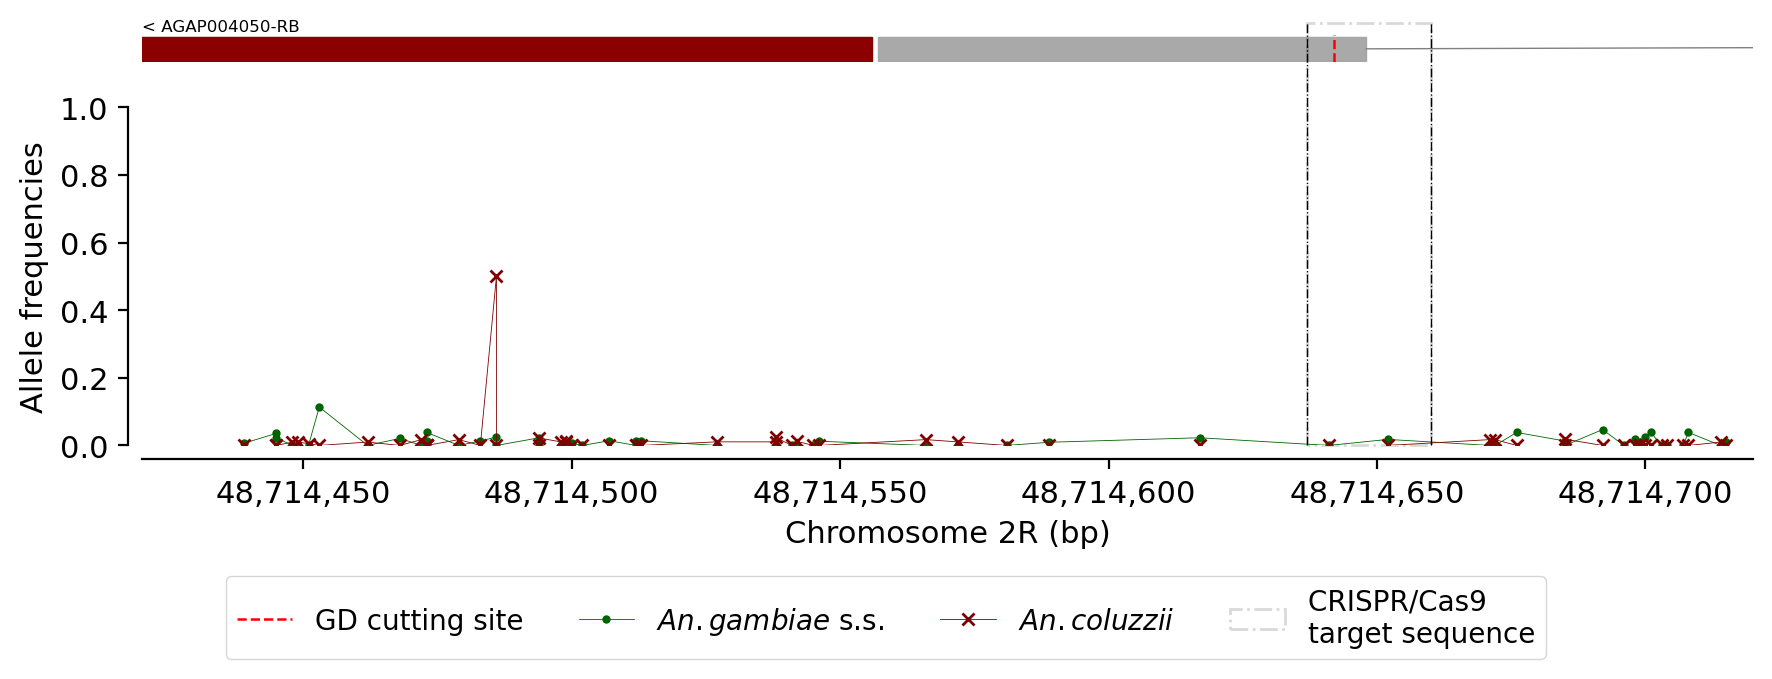

In [109]:
plot_freq123(xlim = pcr, y1=list(freq_data_1.max_acf1), x1=freq_data_1.position, y2= freq_data_1.max_agf1, target=cut_site, 
            exon_label='', target_label='GD cutting site', lab1='$An. gambiae$ s.s.', lab2='$An. coluzzii$', 
            lab_y='Allele frequencies', gd = gds, fig_name = 'ds_freq_GD123.png')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


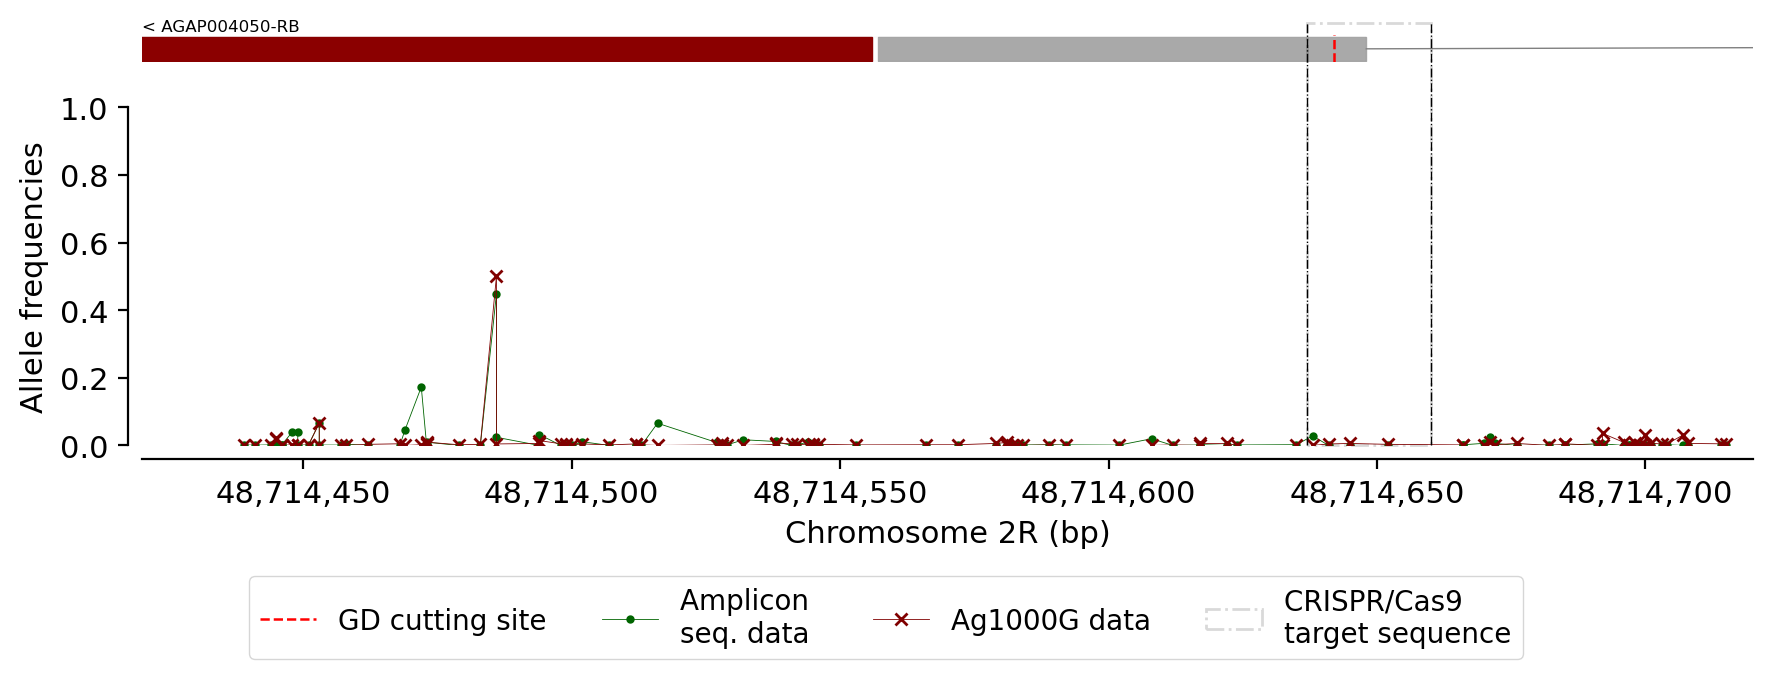

In [110]:
plot_freq123(xlim = pcr, y1=list(data_dsx.Ag1000G), x1=data_dsx.pos, y2= data_dsx.max_af1, gd = gds,target=cut_site,
            exon_label='', target_label='GD cutting site', lab_y='Allele frequencies', fig_name='ds_freq_GD12.png')

C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\546983441.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transcript_data = data[:1].append(data[val:][:1].append(data[val:].query(f"Parent == '{idx}'")))
C:\Users\hp\AppData\Local\Temp\ipykernel_8856\1573379730.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(v)) for v in ax.get_xticks()])


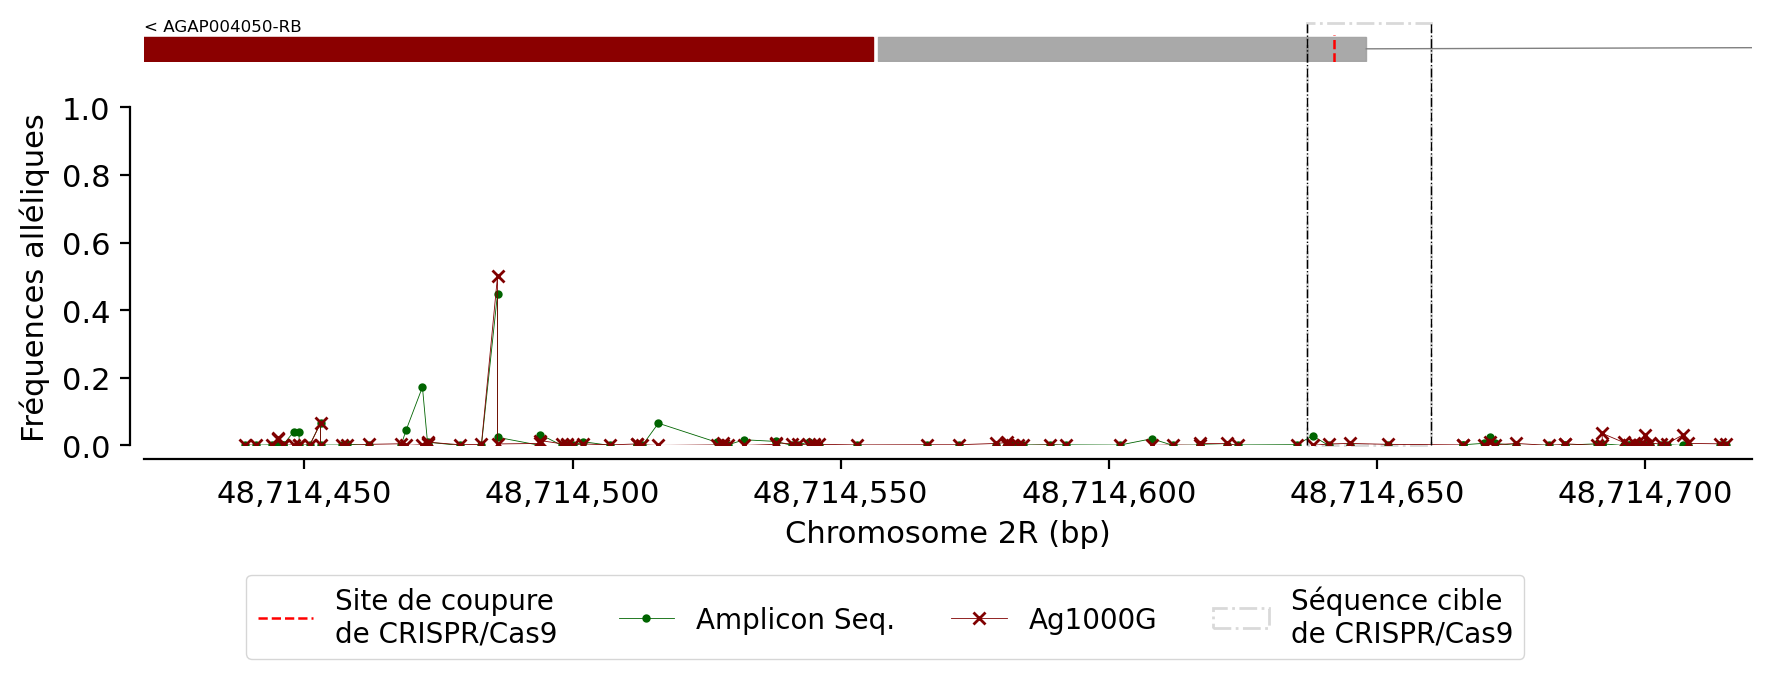

In [111]:
plot_freq123(xlim = pcr, y1=list(data_dsx.Ag1000G), x1=data_dsx.pos, y2= data_dsx.max_af1, gd = gds,target=cut_site,
            exon_label='', target_label='Site de coupure \nde CRISPR/Cas9', lab_y='Fréquences alléliques', 
            fig_name='ds_freq_GD12_fr.png', lab1="Amplicon Seq.", lab2="Ag1000G",
            lab3='Séquence cible \nde CRISPR/Cas9')

In [112]:
data_dsx#['pala_aa']

,chrom,pos,id,ref,alt,region,Ag1000G,lab_sample,bana_ac,sk_ag,...,pala_ac,soni_ac,mg_ac,ti_ac,saran_ac,tosson_ac,max_af1,max_af,max_afac,max_afag
0,2R,48714439,.,C,T,UTR,0.001650,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000000,0.000000
1,2R,48714441,.,G,T,UTR,0.000000,0.000000,0.000696,0.000655,...,0.000000,0.000000,0.000735,0.000740,0.000000,0.000000,0.000746,0.000746,0.000740,0.000746
2,2R,48714444,.,G,T,UTR,0.000000,0.000901,0.000928,0.001039,...,0.001111,0.000985,0.001103,0.001715,0.000907,0.000919,0.001715,0.001715,0.001715,0.001213
3,2R,48714445,.,C,A,UTR,0.022581,0.000000,0.000000,0.000655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001143,0.022581,0.000000,0.001143
4,2R,48714445,.,C,T,UTR,0.017857,0.000999,0.001141,0.001355,...,0.000937,0.001135,0.001264,0.001245,0.001259,0.000895,0.001632,0.017857,0.001264,0.001632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2R,48714704,.,C,A,Intron,0.004425,0.000000,0.001199,0.001491,...,0.001242,0.001306,0.001195,0.001177,0.000000,0.001523,0.001935,0.004425,0.001523,0.001935
97,2R,48714707,.,A,G,Intron,0.030973,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030973,0.000000,0.000000
98,2R,48714708,.,C,T,Intron,0.005952,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005952,0.000000,0.000000
99,2R,48714714,.,T,A,Intron,0.004870,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004870,0.000000,0.000000
